# Nissen et al., 2023: Severe 21st-century OA in Antarctic MPAs
#
# Fig. 5 & Fig. S7: volume distribution of omega aragonite and calcite saturation classes in MPAs (top 2000m)
#
# this script requires post-processed model output

In [2]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from matplotlib import cm
from netCDF4 import Dataset, MFDataset
import pandas as pd

In [8]:
#---
# general info
#---

# where are the data? (names of *nc files are hard-coded in 'get_data()' function below)
path_to_data = '/global/homes/c/cnissen/ARCHIVE_Nissen2023_NatureComms_OA_in_MPAs/nc_files/'
#'/pscratch/sd/c/cnissen/carbonate_chemistry_3D_v2/regional/' 

savepath    = '/global/cfs/cdirs/m4003/cnissen/Plots/Paper_OA_in_MPAs/Fig5_omega_volume_distribution/'
if not os.path.exists(savepath):
    print('Created '+savepath)
    os.makedirs(savepath)

savepath2    = '/global/cfs/cdirs/m4003/cnissen/Plots/Paper_OA_in_MPAs/Fig5_omega_volume_distribution/eps/'
if not os.path.exists(savepath2):
    print('Created '+savepath2)
    os.makedirs(savepath2)


In [ ]:
print area_reg
print np.sum(area_reg[1:])

In [5]:
#---
# function to load variables
#---

def get_data(vari1,vari2,path_to_data):
    
    print ('Load ',vari1,vari2)
    
    file1 = 'Carbonate_chemistry_regional_simAssp585_1990_2100_v3.nc'
    file2 = 'Carbonate_chemistry_regional_simAssp370_2015_2100_v3.nc'
    file3 = 'Carbonate_chemistry_regional_simAssp245_2015_2100_v3.nc'
    file4 = 'Carbonate_chemistry_regional_simAssp126_2015_2100_v3.nc'
    file5 = 'Carbonate_chemistry_regional_simAssp585_1990_2100_v3.nc' 

    ff1 = Dataset(path_to_data + file1)
    ff2 = Dataset(path_to_data + file2)
    ff3 = Dataset(path_to_data + file3)
    ff4 = Dataset(path_to_data + file4)
    ff5 = Dataset(path_to_data + file5)
   
    dataA_1 = ff1.variables[vari1][:,:,:] # month x year x subregion
    dataA_2 = ff2.variables[vari1][:,:,:]
    dataA_3 = ff3.variables[vari1][:,:,:]
    dataA_4 = ff4.variables[vari1][:,:,:]
    dataA_5 = ff5.variables[vari1][:,:,:]

    dataC_1 = ff1.variables[vari2][:,:,:] # month x year x subregion
    dataC_2 = ff2.variables[vari2][:,:,:]
    dataC_3 = ff3.variables[vari2][:,:,:]
    dataC_4 = ff4.variables[vari2][:,:,:]
    dataC_5 = ff5.variables[vari2][:,:,:]

    # for ssp370, ssp245 & ssp126, add historical years to beginning of array 
    # (for these scenarios, data were only post-processed and stored in file from 2015 to 2100)
    fill_array = np.nan*np.ones([dataA_1.shape[0],25,dataA_1.shape[2]])
    dataA_2 = np.concatenate((fill_array,dataA_2),axis=1)
    dataA_3 = np.concatenate((fill_array,dataA_3),axis=1)
    dataA_4 = np.concatenate((fill_array,dataA_4),axis=1)
    dataC_2 = np.concatenate((fill_array,dataC_2),axis=1)
    dataC_3 = np.concatenate((fill_array,dataC_3),axis=1)
    dataC_4 = np.concatenate((fill_array,dataC_4),axis=1)

    ff1.close()
    ff2.close()
    ff3.close()
    ff4.close()
    ff5.close()
    
    data_all_Arag = np.stack((dataA_1,dataA_2,dataA_3,dataA_4,dataA_5),axis=3)
    data_all_Calc = np.stack((dataC_1,dataC_2,dataC_3,dataC_4,dataC_5),axis=3)
    print ('data_all_Arag.shape:',data_all_Arag.shape)
    
    return data_all_Arag,data_all_Calc


In [9]:

vari1 = 'omegaA_avg_top100'
vari2 = 'omegaC_avg_top100'

dataA,dataC = get_data(vari1,vari2,path_to_data)


Load  omegaA_avg_top100 omegaC_avg_top100
data_all_Arag.shape: (12, 111, 28, 5)


Process  above2000
Load  omegaA_vol_above2_above2000 omegaC_vol_above2_above2000
data_all_Arag.shape: (12, 111, 28, 5)
Load  omegaA_vol_above15_above2000 omegaC_vol_above15_above2000
data_all_Arag.shape: (12, 111, 28, 5)
Load  omegaA_vol_below15_above2000 omegaC_vol_below15_above2000
data_all_Arag.shape: (12, 111, 28, 5)
Load  omegaA_vol_below1_above2000 omegaC_vol_below1_above2000
data_all_Arag.shape: (12, 111, 28, 5)
Load  omegaA_vol_below05_above2000 omegaC_vol_below05_above2000
data_all_Arag.shape: (12, 111, 28, 5)
Process  all_shelves


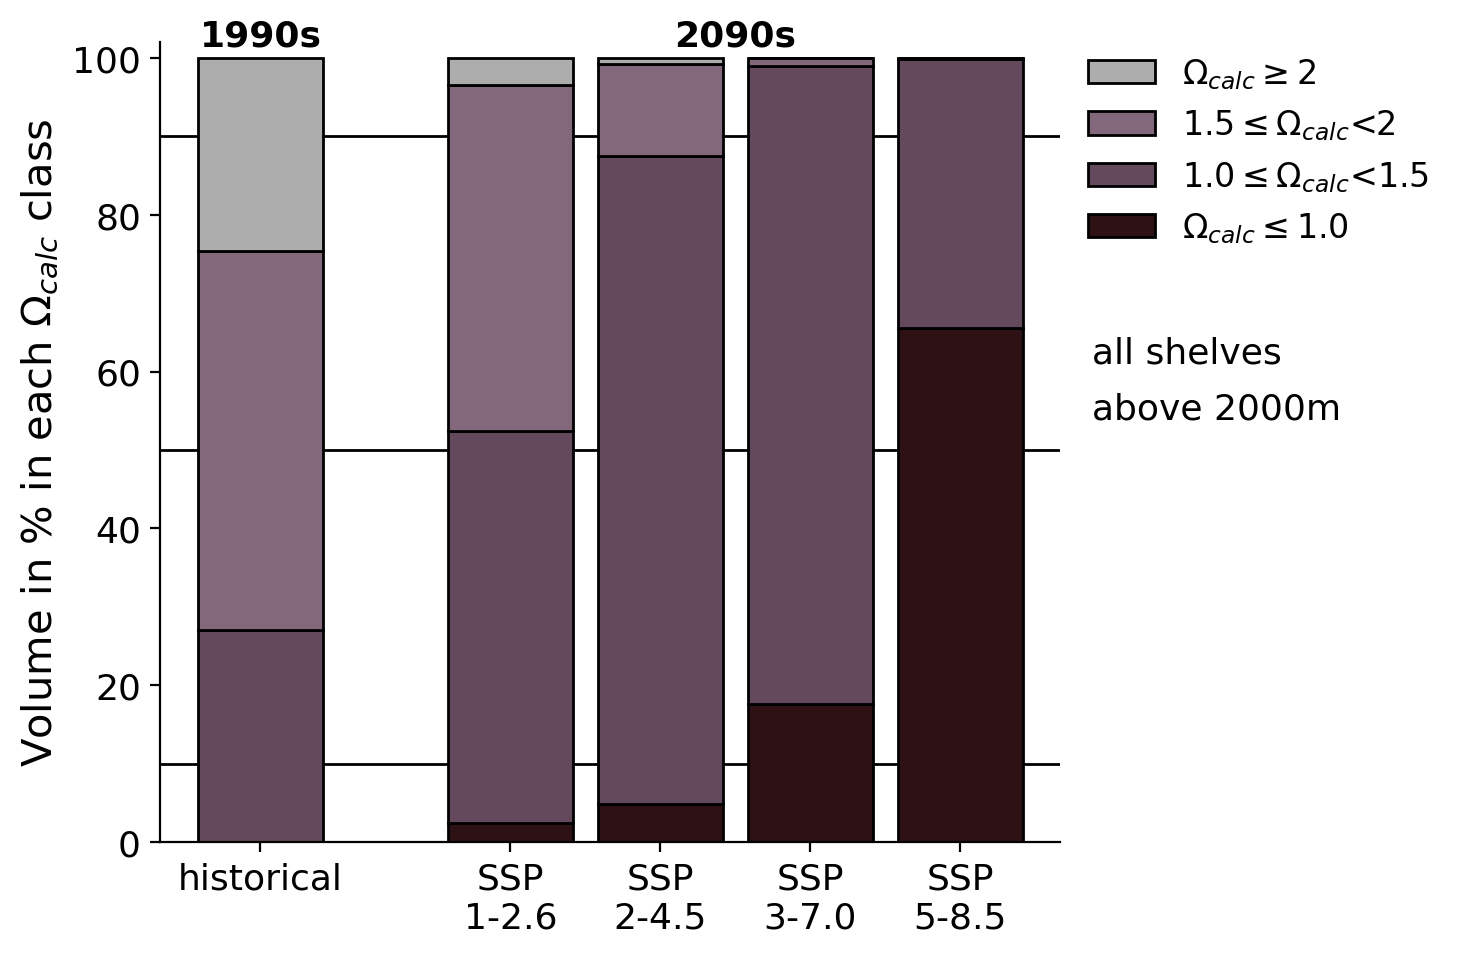

Process  RossSea_MPA


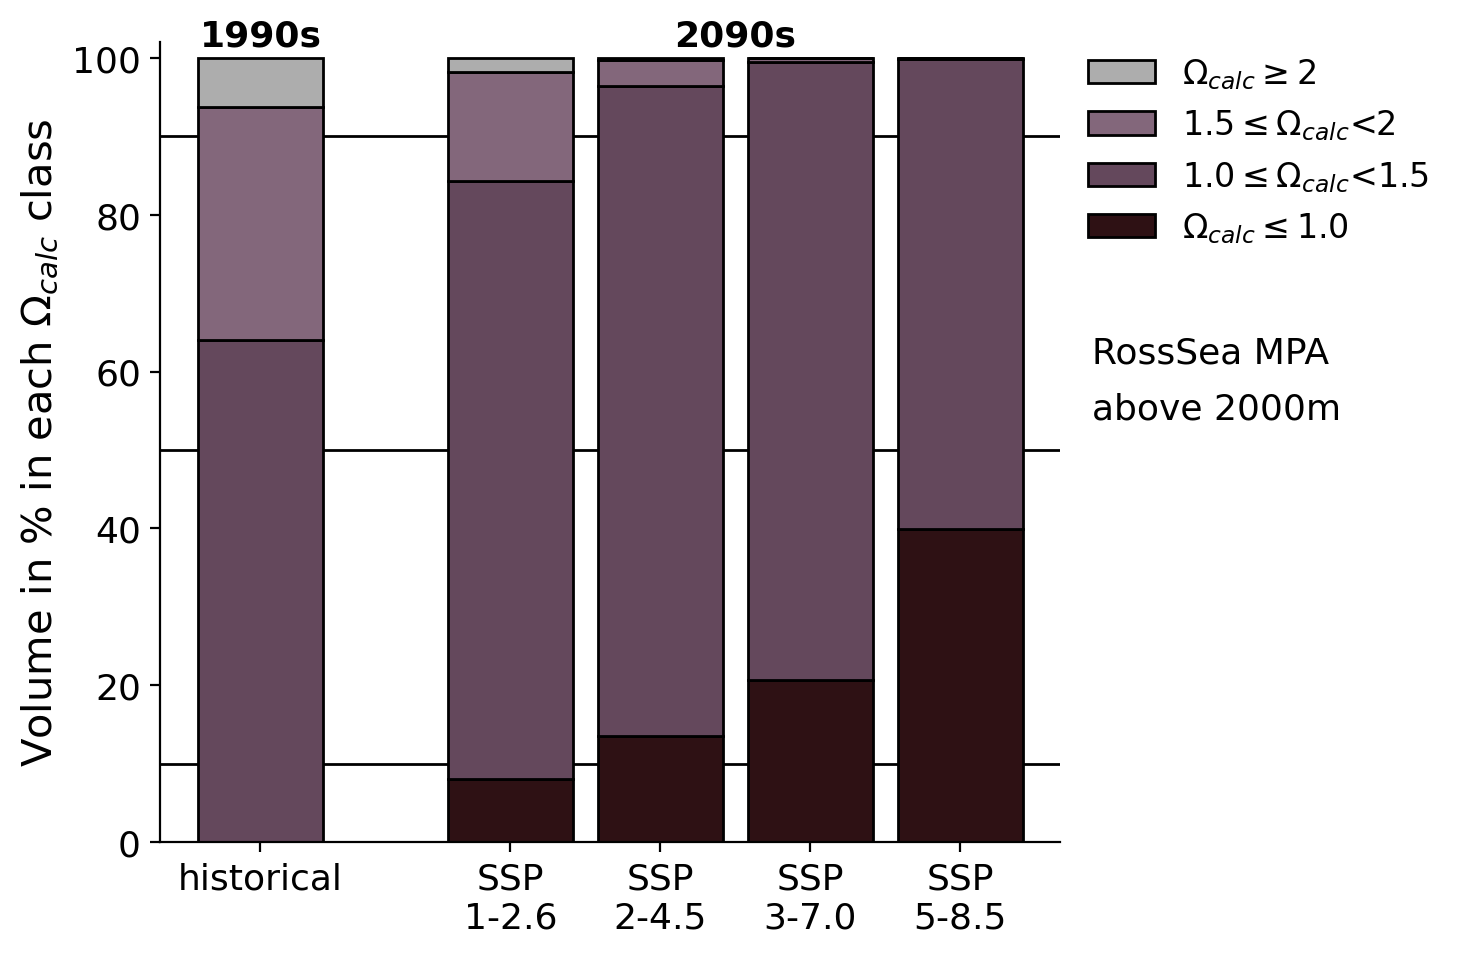

Process  RossSea_MPA_shelf


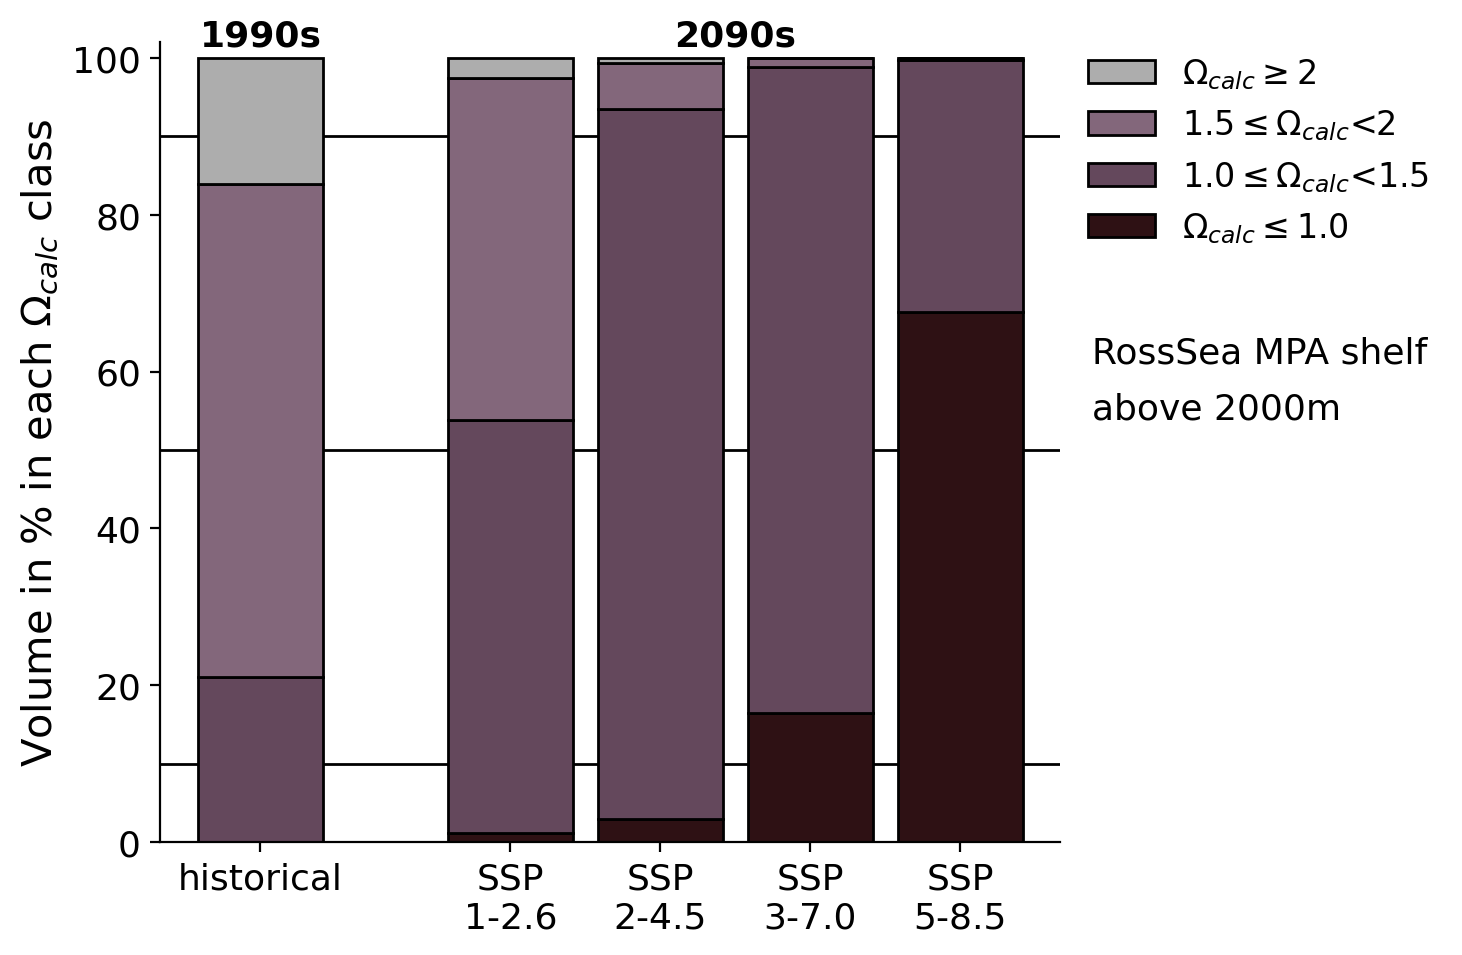

Process  WeddellSea_MPA


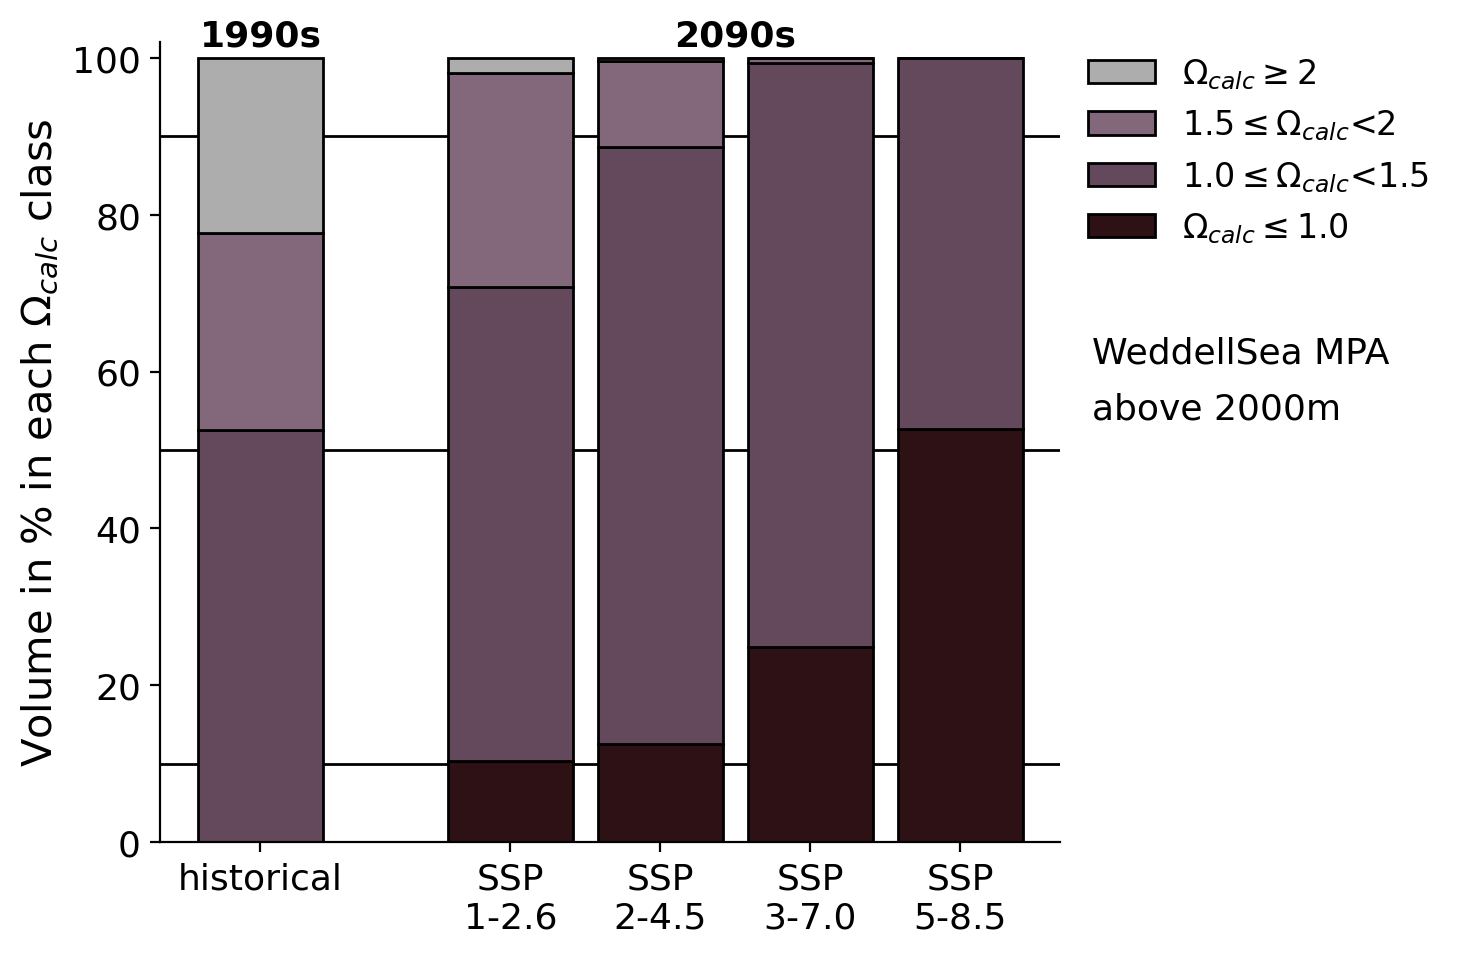

Process  WeddellSea_MPA_shelf


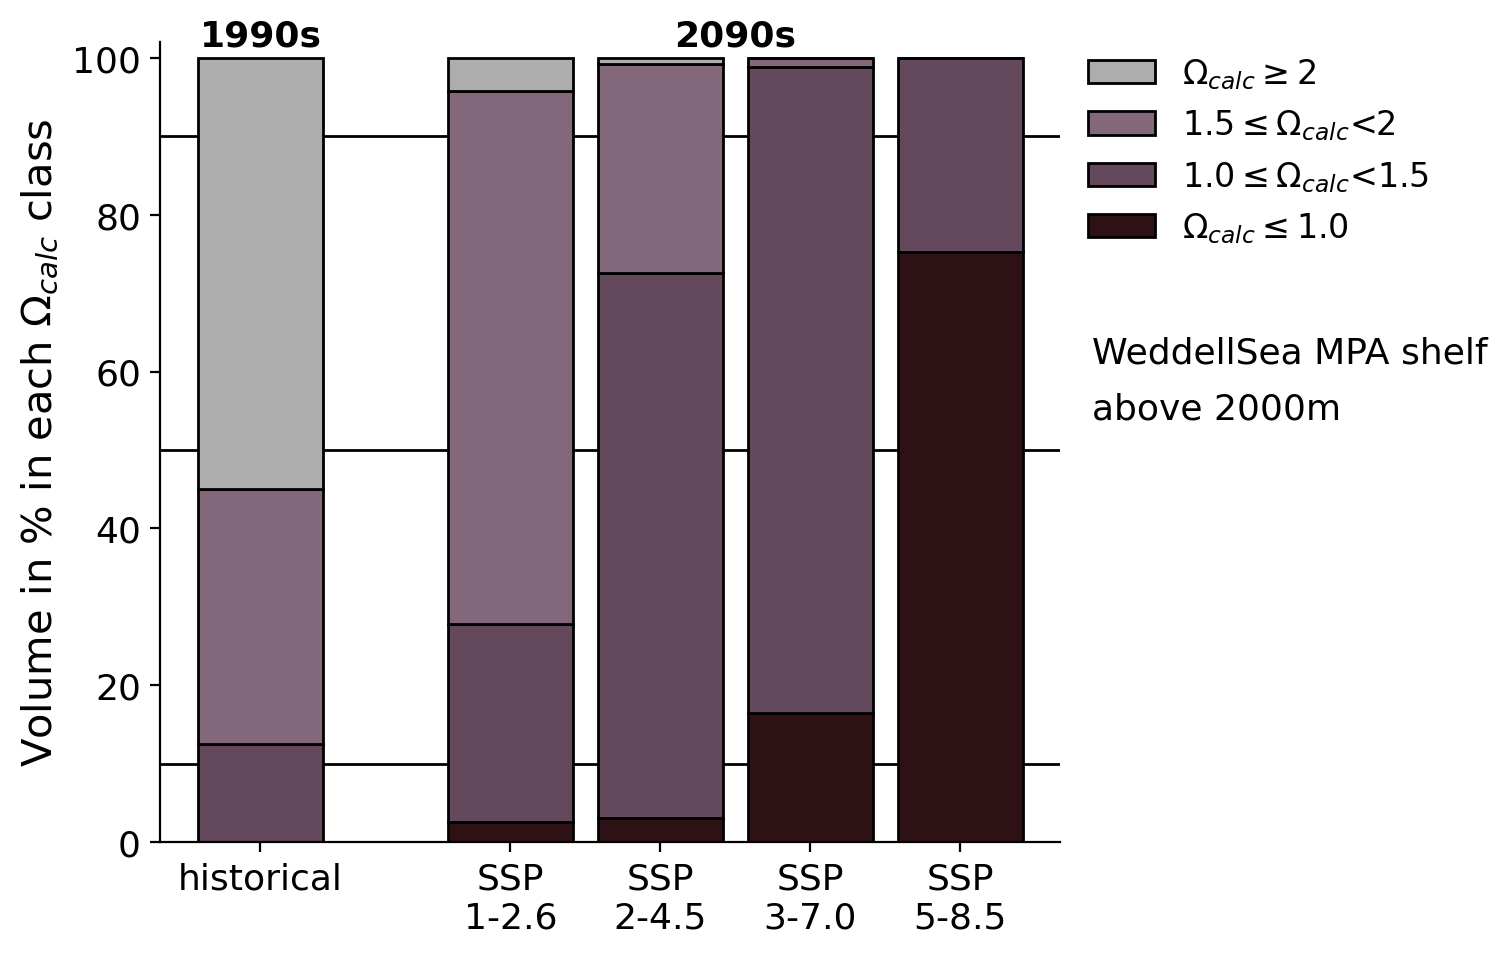

Process  Orkney_MPA


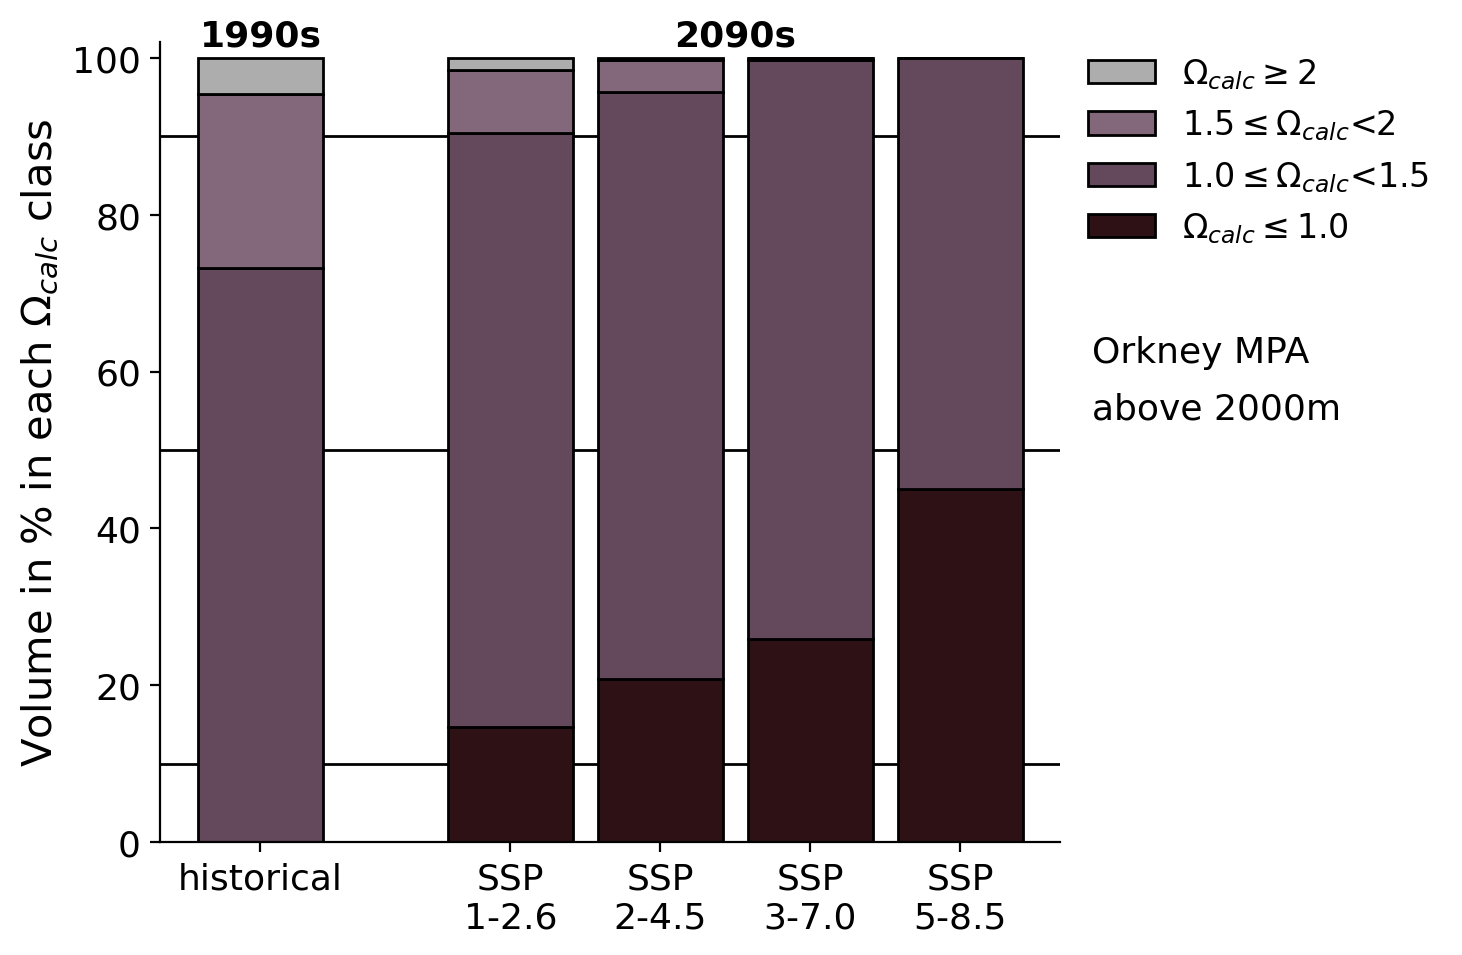

Process  AntarcticPeninsula_MPA


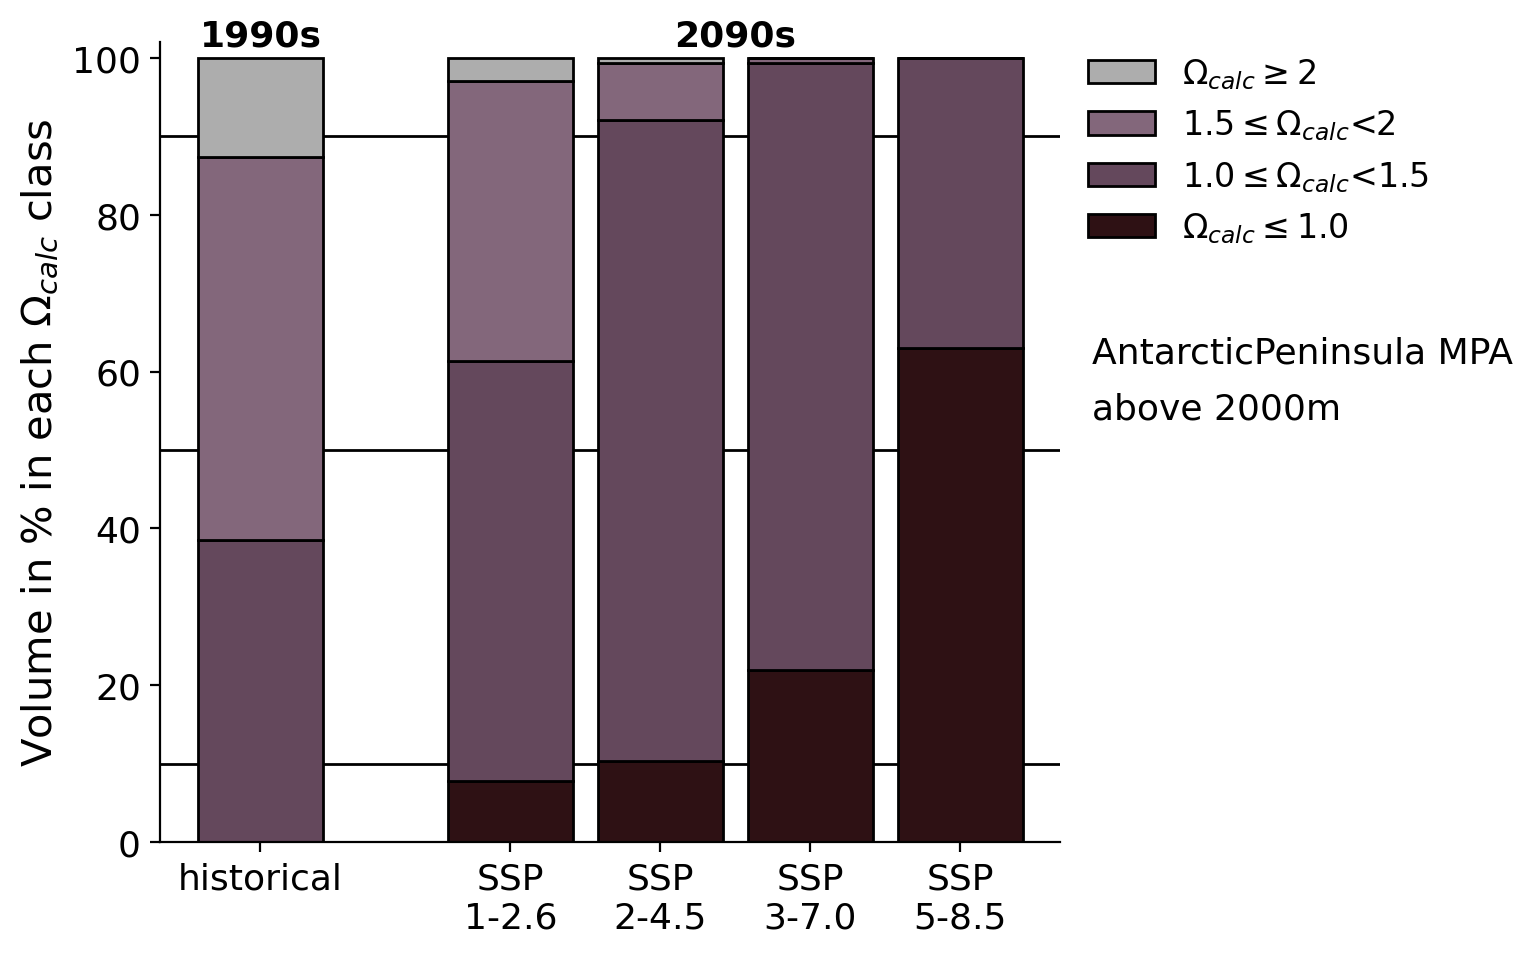

Process  East_Antarctica_all_MPA


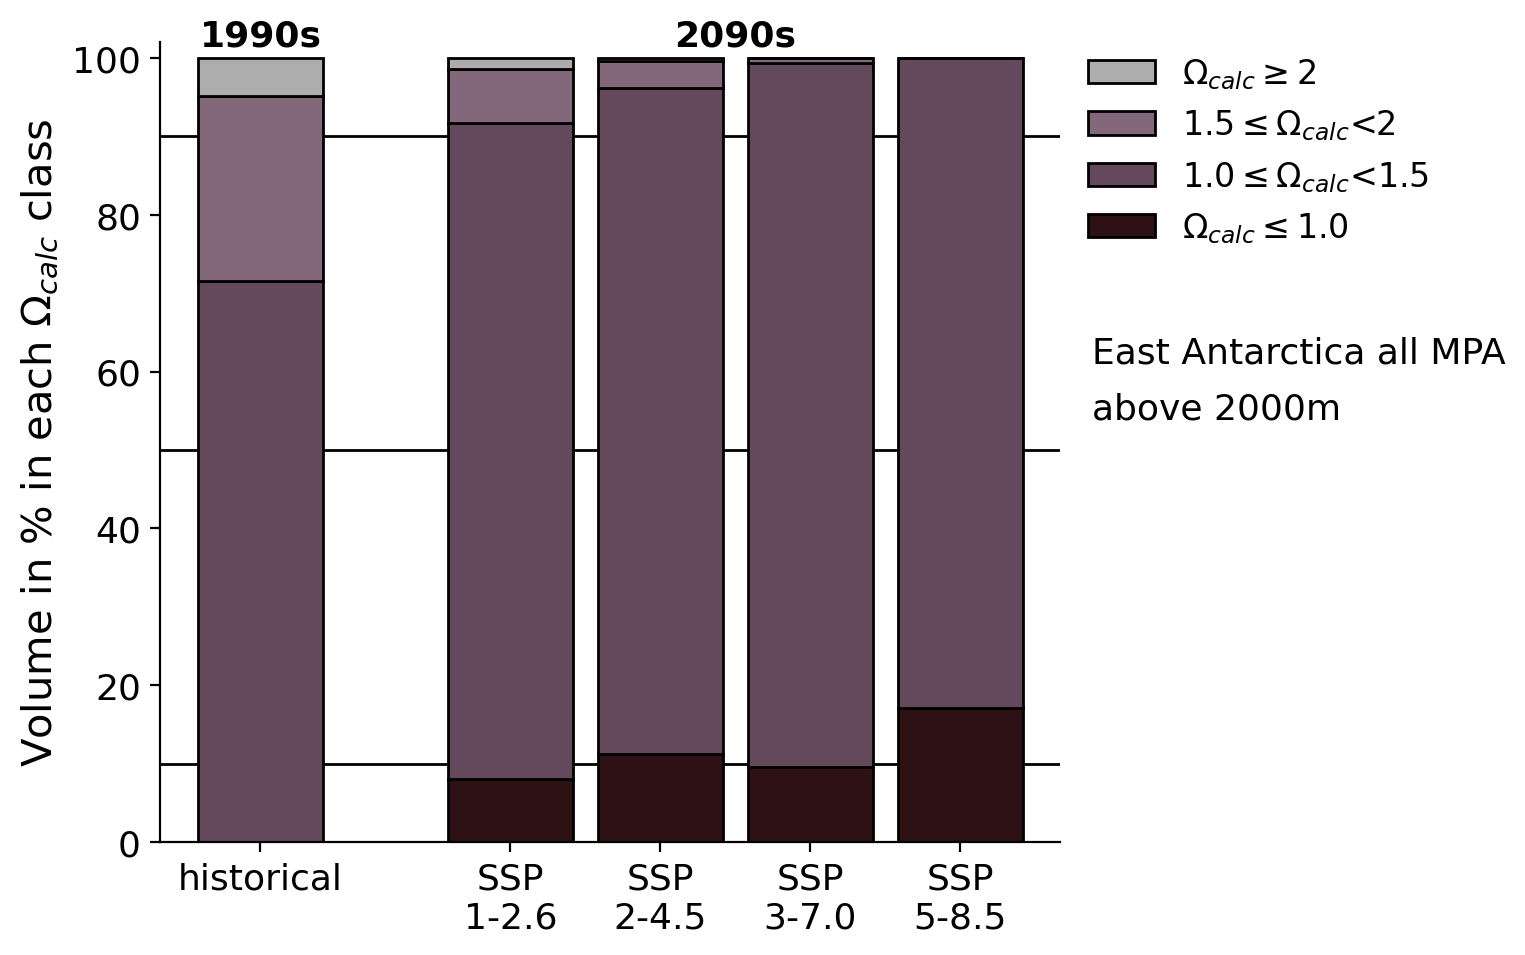

Process  East_Antarctica_all_MPA_shelf


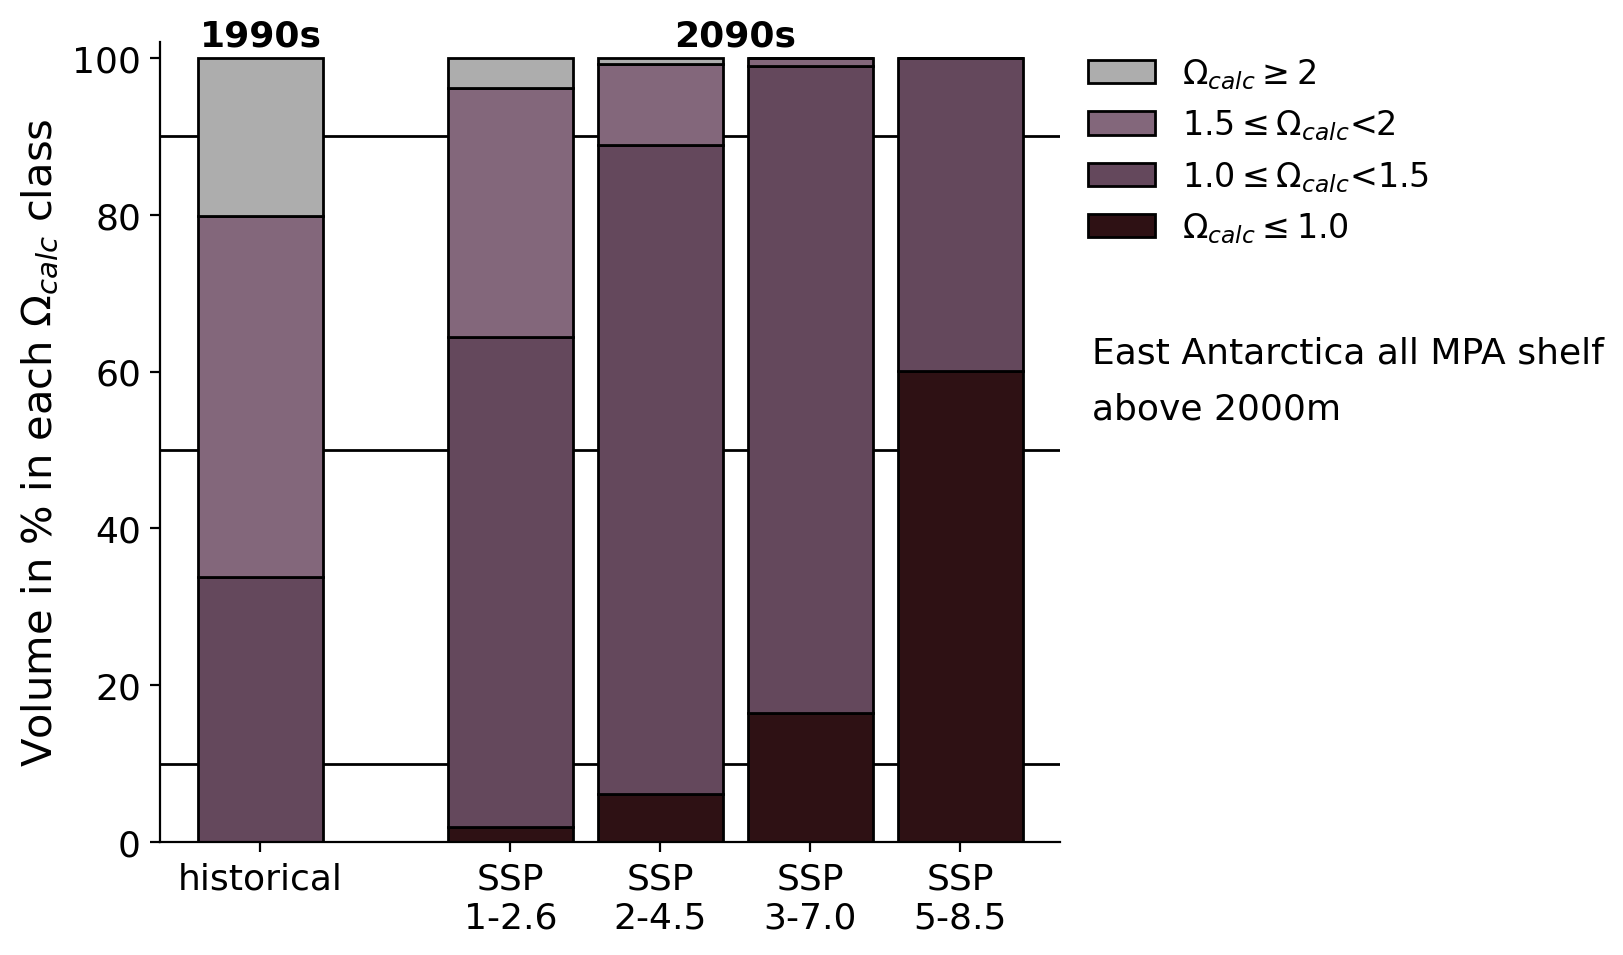

done


In [17]:
#----
# PLOT volume distribution of omega calcite classes
#----

save_plots = False
display_plots = True
plot_eps = False
            
depth_level_list = ['above2000'] #,'water_column']

# all subregions available in file
subregions = ['all_shelves','WeddellSea','eWeddellSea','Prydz','Adelie','RossSea','Amundsen_Bellingshausen','WAP',\
             'RossSea_MPA','RossSea_MPA_shelf','RossSea_MPA_openOcean',\
              'WeddellSea_MPA','WeddellSea_MPA_shelf','WeddellSea_MPA_openOcean',\
              'Orkney_MPA','AntarcticPeninsula_MPA',\
             'East_Antarctica_1_MPA','East_Antarctica_2_MPA','East_Antarctica_3_MPA','East_Antarctica_all_MPA',\
             'East_Antarctica_1_MPA_shelf','East_Antarctica_2_MPA_shelf',\
              'East_Antarctica_3_MPA_shelf','East_Antarctica_all_MPA_shelf',\
             'East_Antarctica_1_MPA_openOcean','East_Antarctica_2_MPA_openOcean',\
              'East_Antarctica_3_MPA_openOcean','East_Antarctica_all_MPA_openOcean']

sim_list = ['ssp585','ssp370','ssp245','ssp126','simB']
sim_list2 = ['SSP\n5-8.5','SSP\n3-7.0','SSP\n2-4.5','SSP\n1-2.6','simB']

color_list = [(51./255.,34./255.,136./255.),(136./255.,204./255.,238./255.),\
                              (68./255.,170./255.,153./255.),(17./255.,119./255.,51./255.),\
                              (153./255.,153./255.,51./255.),(221./255.,204./255.,119./255.),\
                               (204./255.,102./255.,119./255.),(136./255.,34./255.,85./255.)]

#-----
# colors from here: https://visme.co/blog/website-color-schemes/ (schemes 8 & 19)
#-----
# calcite
color1 = (46./255.,17./255.,20./255.) # lowest omega values
color2 = (80./255.,27./255.,29./255.) # 
color3 = (100./255.,72./255.,92./255.) # 
color4 = (131./255.,103./255.,123./255.) # 
color5 = (173./255.,173./255.,173./255.) # highest omega values

fs = 13
dpicnt = 200
            
for dd in range(0,len(depth_level_list)):
    depth_level = depth_level_list[dd] 
    print ('Process ',depth_level)
    
    vari1 = 'omegaA_vol_above2_'+depth_level
    vari2 = 'omegaC_vol_above2_'+depth_level
    dataA_above2,dataC_above2 = get_data(vari1,vari2,path_to_data)

    vari1 = 'omegaA_vol_above15_'+depth_level
    vari2 = 'omegaC_vol_above15_'+depth_level
    dataA_above15,dataC_above15 = get_data(vari1,vari2,path_to_data)

    vari1 = 'omegaA_vol_below15_'+depth_level
    vari2 = 'omegaC_vol_below15_'+depth_level
    dataA_below15,dataC_below15 = get_data(vari1,vari2,path_to_data)

    vari1 = 'omegaA_vol_below1_'+depth_level
    vari2 = 'omegaC_vol_below1_'+depth_level
    dataA_below1,dataC_below1 = get_data(vari1,vari2,path_to_data)

    vari1 = 'omegaA_vol_below05_'+depth_level
    vari2 = 'omegaC_vol_below05_'+depth_level
    dataA_below05,dataC_below05 = get_data(vari1,vari2,path_to_data)

    for rr in [0,8,9,11,12,14,15,19,23]: #range(0,len(subregions)):
        rr = subregions.index(subregions[rr])
        print ('Process ',subregions[rr])
        
        dataA_above2a = np.mean(dataA_above2[:,:,rr,:],axis=0)
        dataC_above2a = np.mean(dataC_above2[:,:,rr,:],axis=0)

        dataA_above15a = np.mean(dataA_above15[:,:,rr,:],axis=0)
        dataC_above15a = np.mean(dataC_above15[:,:,rr,:],axis=0)

        dataA_below15a = np.mean(dataA_below15[:,:,rr,:],axis=0)
        dataC_below15a = np.mean(dataC_below15[:,:,rr,:],axis=0)

        dataA_below1a = np.mean(dataA_below1[:,:,rr,:],axis=0)
        dataC_below1a = np.mean(dataC_below1[:,:,rr,:],axis=0)

        dataA_below05a = np.mean(dataA_below05[:,:,rr,:],axis=0)
        dataC_below05a = np.mean(dataC_below05[:,:,rr,:],axis=0)

        # 1990s
        dataC_above2_1990s  = np.mean(dataC_above2a[0:9+1,0],axis=0)
        dataC_above15_1990s = np.mean(dataC_above15a[0:9+1,0],axis=0)
        dataC_below15_1990s = np.mean(dataC_below15a[0:9+1,0],axis=0)
        dataC_below1_1990s  = np.mean(dataC_below1a[0:9+1,0],axis=0)
        dataC_below05_1990s = np.mean(dataC_below05a[0:9+1,0],axis=0)
        
        a1 = dataC_above2_1990s
        a2 = dataC_above15_1990s-dataC_above2_1990s
        a3 = dataC_below15_1990s-dataC_below1_1990s
        a4 = dataC_below1_1990s-dataC_below05_1990s
        a5 = dataC_below05_1990s
        #print 'HISTORICAL: >2, 1.5-2, 1-1.5, 0.5-1, <0.5:',a1,a2,a3,a4,a5

        # 2050s
        dataC_above2_2050s  = np.mean(dataC_above2a[60:69+1,:],axis=0)
        dataC_above15_2050s = np.mean(dataC_above15a[60:69+1,:],axis=0)
        dataC_below15_2050s = np.mean(dataC_below15a[60:69+1,:],axis=0)
        dataC_below1_2050s  = np.mean(dataC_below1a[60:69+1,:],axis=0)
        dataC_below05_2050s = np.mean(dataC_below05a[60:69+1,:],axis=0)

        # 2090s
        dataC_above2_2090s  = np.mean(dataC_above2a[100:109+1,:],axis=0)
        dataC_above15_2090s = np.mean(dataC_above15a[100:109+1,:],axis=0)
        dataC_below15_2090s = np.mean(dataC_below15a[100:109+1,:],axis=0)
        dataC_below1_2090s  = np.mean(dataC_below1a[100:109+1,:],axis=0)
        dataC_below05_2090s = np.mean(dataC_below05a[100:109+1,:],axis=0)
            
        del dataC_above2a,dataC_above15a,dataC_below15a,dataC_below1a,dataC_below05a
        
        #---
        # have all scenarios in a single plot
        #---
        plot_combined = True
        if plot_combined:
            
            width1 = 0.5
            ec = 'k'
            
            fig7= plt.figure(num=18, figsize=(4.5,4), dpi=dpicnt, facecolor='w', edgecolor='k')
            ax = fig7.add_axes([0, 0, 1, 1])
            
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            #ax.spines['bottom'].set_visible(False)
            #ax.spines['left'].set_visible(False)

            # 1990s
            xpos = 1
            plt.bar(xpos,a4+a5,color=color1,width=width1,edgecolor=ec,label='$\Omega_{calc}$$\leq$1.0')
            #plt.bar(xpos,a4,bottom=a5,color=color2,width=width1,edgecolor=ec,label='$0.5\leq\Omega_{calc}$<1.0')
            plt.bar(xpos,a3,bottom=a5+a4,color=color3,width=width1,edgecolor=ec,label='$1.0\leq\Omega_{calc}$<1.5')
            plt.bar(xpos,a2,bottom=a5+a4+a3,color=color4,width=width1,edgecolor=ec,label='$1.5\leq\Omega_{calc}$<2')
            plt.bar(xpos,a1,bottom=a5+a4+a3+a2,color=color5,width=width1,edgecolor=ec,label='$\Omega_{calc}$$\geq$2')

            #----
            # 2090s
            #----
            ss = 3
            c1 = dataC_above2_2090s[ss]
            c2 = dataC_above15_2090s[ss]-dataC_above2_2090s[ss]
            c3 = dataC_below15_2090s[ss]-dataC_below1_2090s[ss]
            c4 = dataC_below1_2090s[ss]-dataC_below05_2090s[ss]
            c5 = dataC_below05_2090s[ss]
            xpos = 2
            plt.bar(xpos,c4+c5,color=color1,width=width1,edgecolor=ec)
            #plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
            plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
            plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
            plt.bar(xpos,c1,bottom=c5+c4+c3+c2,color=color5,width=width1,edgecolor=ec)
            #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5
            
            ss = 2
            c1 = dataC_above2_2090s[ss]
            c2 = dataC_above15_2090s[ss]-dataC_above2_2090s[ss]
            c3 = dataC_below15_2090s[ss]-dataC_below1_2090s[ss]
            c4 = dataC_below1_2090s[ss]-dataC_below05_2090s[ss]
            c5 = dataC_below05_2090s[ss]
            xpos = 2.6
            plt.bar(xpos,c4+c5,color=color1,width=width1,edgecolor=ec)
            #plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
            plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
            plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
            plt.bar(xpos,c1,bottom=c5+c4+c3+c2,color=color5,width=width1,edgecolor=ec)
            #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5
            
            ss = 1
            c1 = dataC_above2_2090s[ss]
            c2 = dataC_above15_2090s[ss]-dataC_above2_2090s[ss]
            c3 = dataC_below15_2090s[ss]-dataC_below1_2090s[ss]
            c4 = dataC_below1_2090s[ss]-dataC_below05_2090s[ss]
            c5 = dataC_below05_2090s[ss]
            xpos = 3.2
            plt.bar(xpos,c4+c5,color=color1,width=width1,edgecolor=ec)
            #plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
            plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
            plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
            plt.bar(xpos,c1,bottom=c5+c4+c3+c2,color=color5,width=width1,edgecolor=ec)
            #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5
            
            ss = 0
            c1 = dataC_above2_2090s[ss]
            c2 = dataC_above15_2090s[ss]-dataC_above2_2090s[ss]
            c3 = dataC_below15_2090s[ss]-dataC_below1_2090s[ss]
            c4 = dataC_below1_2090s[ss]-dataC_below05_2090s[ss]
            c5 = dataC_below05_2090s[ss]
            xpos = 3.8
            plt.bar(xpos,c4+c5,color=color1,width=width1,edgecolor=ec)
            #plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
            plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
            plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
            plt.bar(xpos,c1,bottom=c5+c4+c3+c2,color=color5,width=width1,edgecolor=ec)
            #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5
            
            
            plt.ylim((0,102))
            xlim1,xlim2 = 0.6,4.2
            plt.hlines(90,xlim1,xlim2,color='black',linewidth=1,linestyle='-',zorder=0)
            plt.hlines(50,xlim1,xlim2,color='black',linewidth=1,linestyle='-',zorder=0)
            plt.hlines(10,xlim1,xlim2,color='black',linewidth=1,linestyle='-',zorder=0)
            plt.xlim((xlim1,xlim2))
            
            handles, labels = plt.gca().get_legend_handles_labels() 
            order = [3,2,1,0] ##specify order of items in legend

            plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], \
                       loc='upper center', bbox_to_anchor=(1.22, 1.02),\
                            ncol=1,fancybox=True, frameon=False,shadow=False,prop={'size': 12})

            plt.xticks([1,2,2.6,3.2,3.8],['historical',sim_list2[3],sim_list2[2],\
                        sim_list2[1],sim_list2[0]],fontsize=fs) #fontweight='bold',
        
            ypos = 101.5
            plt.annotate('1990s',xy=(1,ypos), xycoords='data',\
                                         ha='center',fontsize=fs,fontweight='bold',color='black')
            plt.annotate('2090s',xy=(2.9,ypos), xycoords='data',\
                                         ha='center',fontsize=fs,fontweight='bold',color='black')
            
            plt.yticks(fontsize=fs)

            plt.ylabel('Volume in % in each $\Omega_{calc}$ class',fontsize=fs+2)
            
            xpos_tt = 1.035
            plt.annotate(subregions[rr].replace("_"," "),xy=(xpos_tt,0.6), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')
        
            if depth_level in ['water_column']:
                plt.annotate('whole water column',xy=(xpos_tt,0.53), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')
            elif depth_level in ['top50']:
                plt.annotate('top 50m',xy=(xpos_tt,0.53), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')
            elif depth_level in ['0_10']:
                plt.annotate('0-10m',xy=(xpos_tt,0.53), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')
            elif depth_level in ['10_100']:
                plt.annotate('10-100m',xy=(xpos_tt,0.53), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')
            elif depth_level in ['100_500']:
                plt.annotate('100-500m',xy=(xpos_tt,0.53), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')
            elif depth_level in ['below500']:
                plt.annotate('below 500m',xy=(xpos_tt,0.53), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')
            elif depth_level in ['above2000']:
                plt.annotate('above 2000m',xy=(xpos_tt,0.53), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')

            if save_plots:
                filename = 'Volume_omega_calc_saturation_classes_ALL_SIM_'+\
                        subregions[rr]+'_'+depth_level+'_without_2050s.png'
                plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight')
                del filename

            if display_plots:
                plt.show()
            else:
                plt.close(fig7)
                
            #-----
            # eps version
            #-----
            if plot_eps:
                
                fig7= plt.figure(num=18, figsize=(4.5,4), dpi=dpicnt, facecolor='w', edgecolor='k')
                ax = fig7.add_axes([0, 0, 1, 1])

                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                #ax.spines['bottom'].set_visible(False)
                #ax.spines['left'].set_visible(False)

                # 1990s
                xpos = 1
                plt.bar(xpos,a4+a5,color=color1,width=width1,edgecolor=ec,label='$\Omega_{calc}$$\leq$1.0')
                #plt.bar(xpos,a4,bottom=a5,color=color2,width=width1,edgecolor=ec,label='$0.5\leq\Omega_{calc}$<1.0')
                plt.bar(xpos,a3,bottom=a5+a4,color=color3,width=width1,edgecolor=ec,label='$1.0\leq\Omega_{calc}$<1.5')
                plt.bar(xpos,a2,bottom=a5+a4+a3,color=color4,width=width1,edgecolor=ec,label='$1.5\leq\Omega_{calc}$<2')
                plt.bar(xpos,a1,bottom=a5+a4+a3+a2,color=color5,width=width1,edgecolor=ec,label='$\Omega_{calc}$$\geq$2')

                #----
                # 2090s
                #----
                ss = 3
                c1 = dataC_above2_2090s[ss]
                c2 = dataC_above15_2090s[ss]-dataC_above2_2090s[ss]
                c3 = dataC_below15_2090s[ss]-dataC_below1_2090s[ss]
                c4 = dataC_below1_2090s[ss]-dataC_below05_2090s[ss]
                c5 = dataC_below05_2090s[ss]
                xpos = 2
                plt.bar(xpos,c4+c5,color=color1,width=width1,edgecolor=ec)
                #plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
                plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
                plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
                plt.bar(xpos,c1,bottom=c5+c4+c3+c2,color=color5,width=width1,edgecolor=ec)
                #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5

                ss = 2
                c1 = dataC_above2_2090s[ss]
                c2 = dataC_above15_2090s[ss]-dataC_above2_2090s[ss]
                c3 = dataC_below15_2090s[ss]-dataC_below1_2090s[ss]
                c4 = dataC_below1_2090s[ss]-dataC_below05_2090s[ss]
                c5 = dataC_below05_2090s[ss]
                xpos = 2.6
                plt.bar(xpos,c4+c5,color=color1,width=width1,edgecolor=ec)
                #plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
                plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
                plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
                plt.bar(xpos,c1,bottom=c5+c4+c3+c2,color=color5,width=width1,edgecolor=ec)
                #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5

                ss = 1
                c1 = dataC_above2_2090s[ss]
                c2 = dataC_above15_2090s[ss]-dataC_above2_2090s[ss]
                c3 = dataC_below15_2090s[ss]-dataC_below1_2090s[ss]
                c4 = dataC_below1_2090s[ss]-dataC_below05_2090s[ss]
                c5 = dataC_below05_2090s[ss]
                xpos = 3.2
                plt.bar(xpos,c4+c5,color=color1,width=width1,edgecolor=ec)
                #plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
                plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
                plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
                plt.bar(xpos,c1,bottom=c5+c4+c3+c2,color=color5,width=width1,edgecolor=ec)
                #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5

                ss = 0
                c1 = dataC_above2_2090s[ss]
                c2 = dataC_above15_2090s[ss]-dataC_above2_2090s[ss]
                c3 = dataC_below15_2090s[ss]-dataC_below1_2090s[ss]
                c4 = dataC_below1_2090s[ss]-dataC_below05_2090s[ss]
                c5 = dataC_below05_2090s[ss]
                xpos = 3.8
                plt.bar(xpos,c4+c5,color=color1,width=width1,edgecolor=ec)
                #plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
                plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
                plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
                plt.bar(xpos,c1,bottom=c5+c4+c3+c2,color=color5,width=width1,edgecolor=ec)
                #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5


                plt.ylim((0,102))
                xlim1,xlim2 = 0.6,4.2
                plt.hlines(90,xlim1,xlim2,color='black',linewidth=1,linestyle='-',zorder=0)
                plt.hlines(50,xlim1,xlim2,color='black',linewidth=1,linestyle='-',zorder=0)
                plt.hlines(10,xlim1,xlim2,color='black',linewidth=1,linestyle='-',zorder=0)
                plt.xlim((xlim1,xlim2))

                plt.xticks([1,2,2.6,3.2,3.8],[],fontsize=fs) #fontweight='bold',
                
                ypos = 101.5
                
                plt.yticks([0,20,40,60,80,100],[],fontsize=fs)

                if save_plots:
                    filename = 'Volume_omega_calc_saturation_classes_ALL_SIM_'+\
                            subregions[rr]+'_'+depth_level+'_without_2050s.eps'
                    plt.savefig(savepath+'eps/'+filename,dpi = dpicnt, bbox_inches='tight',format='eps')
                    del filename

                if display_plots:
                    plt.show()
                else:
                    plt.close(fig7)
                
        del dataC_above2_2090s,dataC_above15_2090s,dataC_below15_2090s,dataC_below1_2090s,dataC_below05_2090s
        del dataC_above2_2050s,dataC_above15_2050s,dataC_below15_2050s,dataC_below1_2050s,dataC_below05_2050s
            
print ('done')





Process  above2000
Load  omegaA_vol_above2_above2000 omegaC_vol_above2_above2000
data_all_Arag.shape: (12, 111, 28, 5)
Load  omegaA_vol_above15_above2000 omegaC_vol_above15_above2000
data_all_Arag.shape: (12, 111, 28, 5)
Load  omegaA_vol_below15_above2000 omegaC_vol_below15_above2000
data_all_Arag.shape: (12, 111, 28, 5)
Load  omegaA_vol_below1_above2000 omegaC_vol_below1_above2000
data_all_Arag.shape: (12, 111, 28, 5)
Load  omegaA_vol_below05_above2000 omegaC_vol_below05_above2000
data_all_Arag.shape: (12, 111, 28, 5)
Process  all_shelves


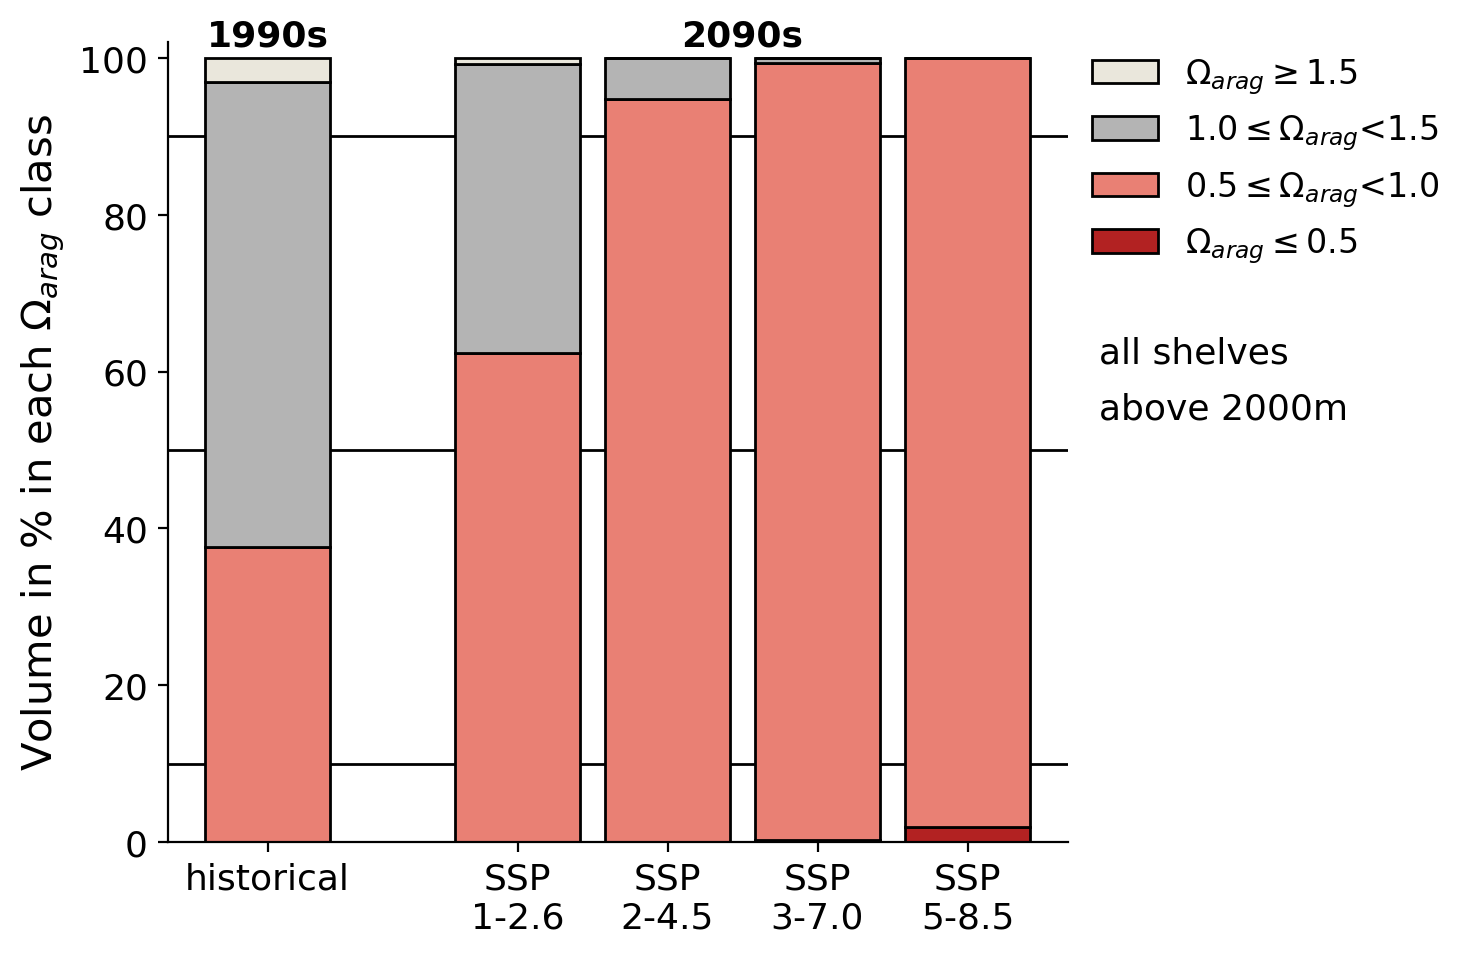

Process  RossSea_MPA


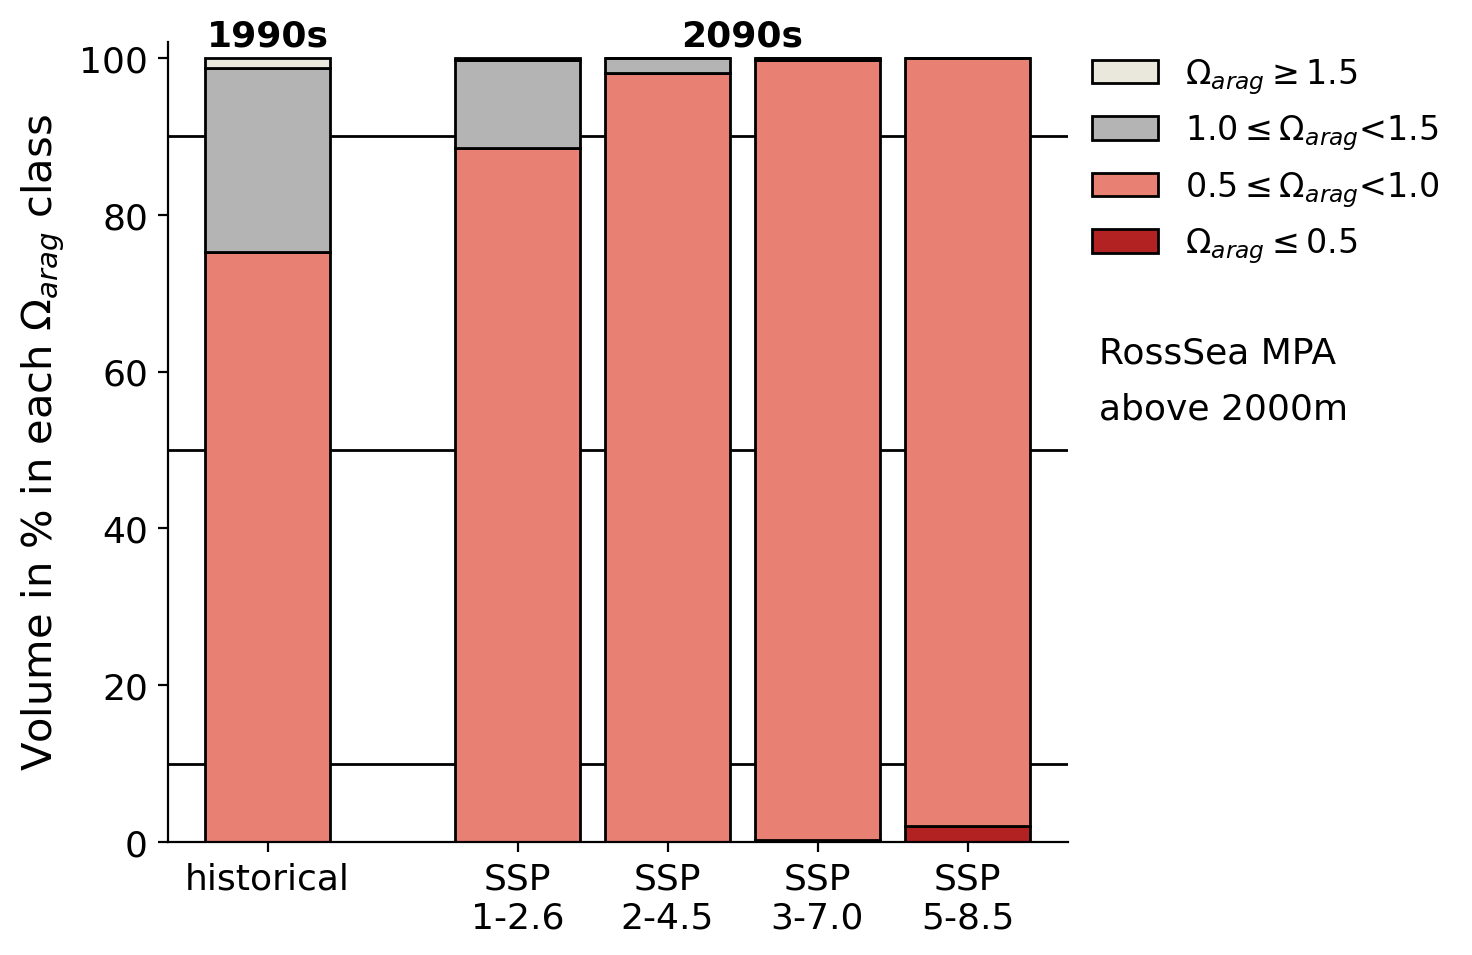

Process  RossSea_MPA_shelf


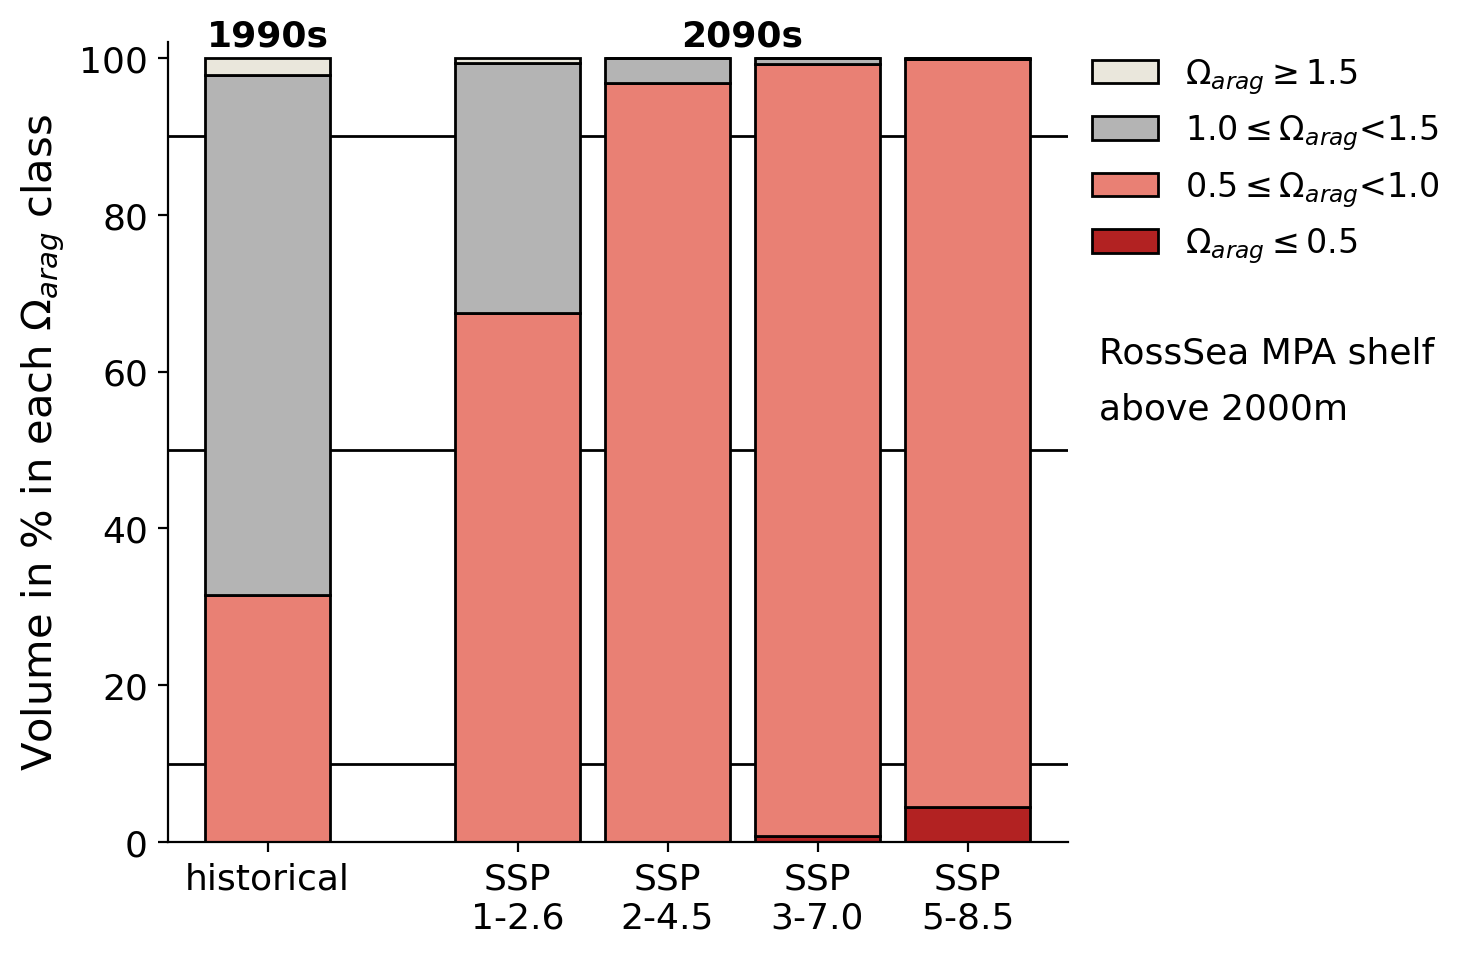

Process  WeddellSea_MPA


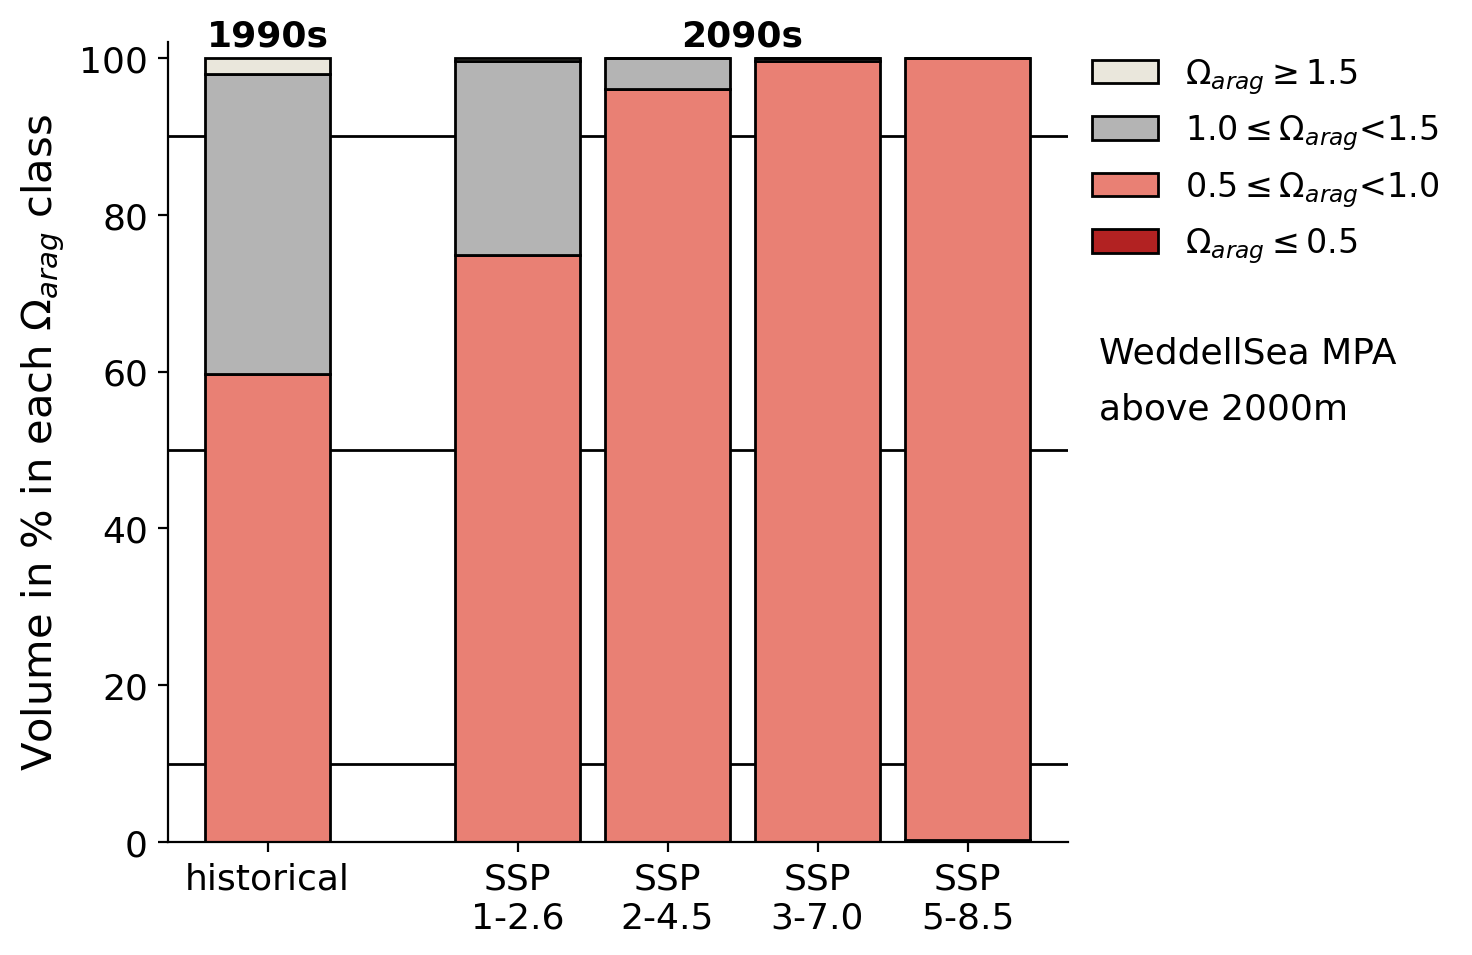

Process  WeddellSea_MPA_shelf


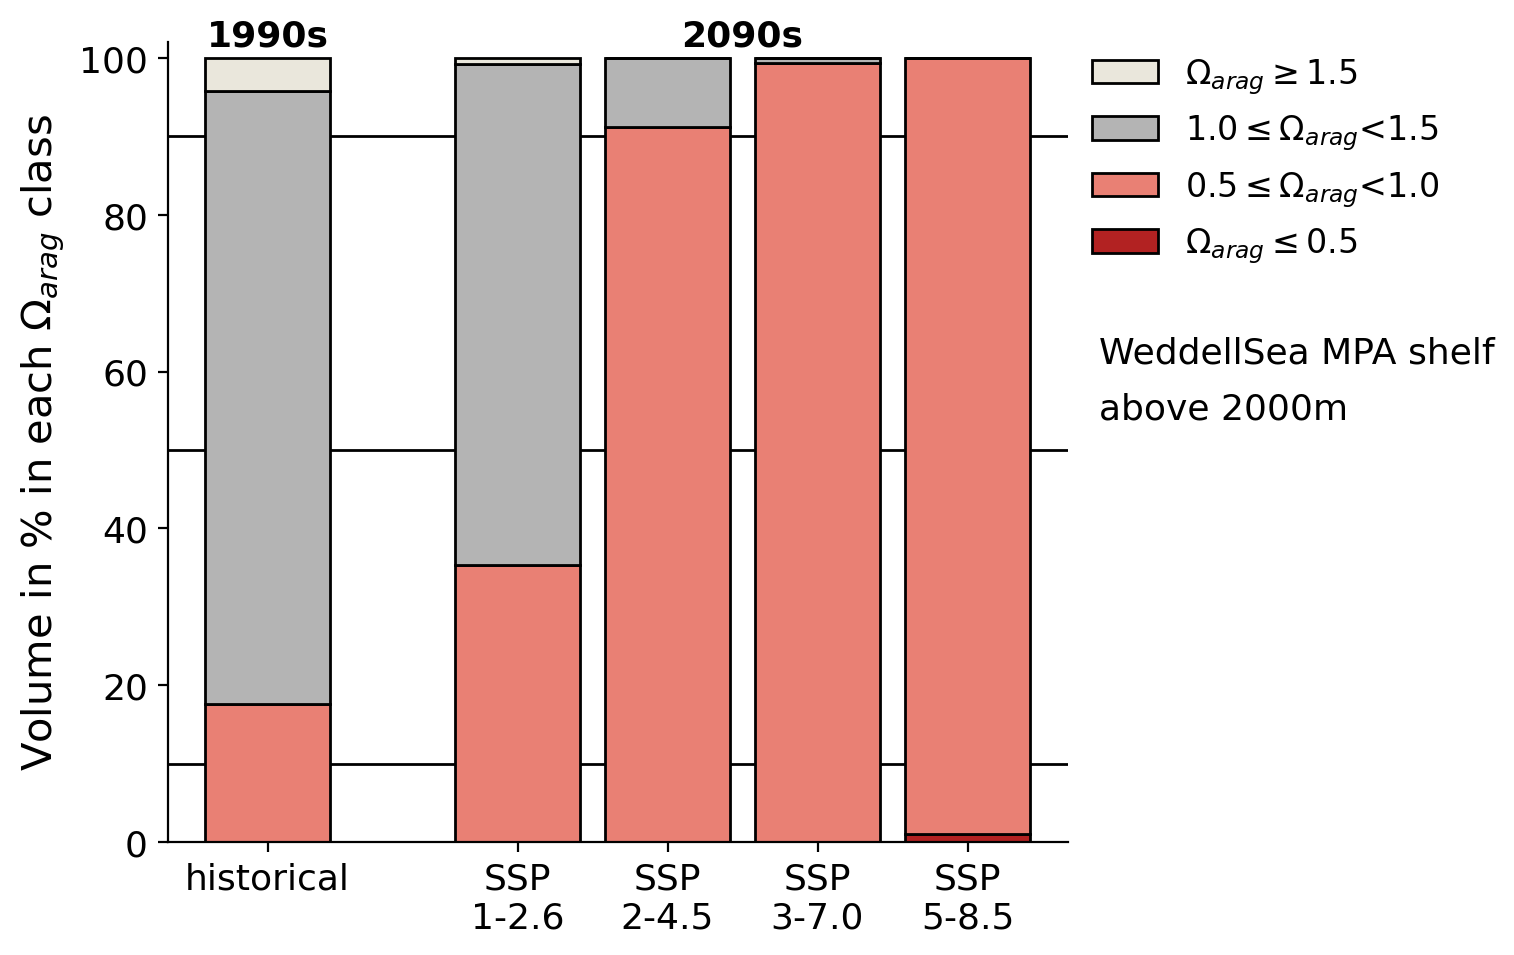

Process  Orkney_MPA


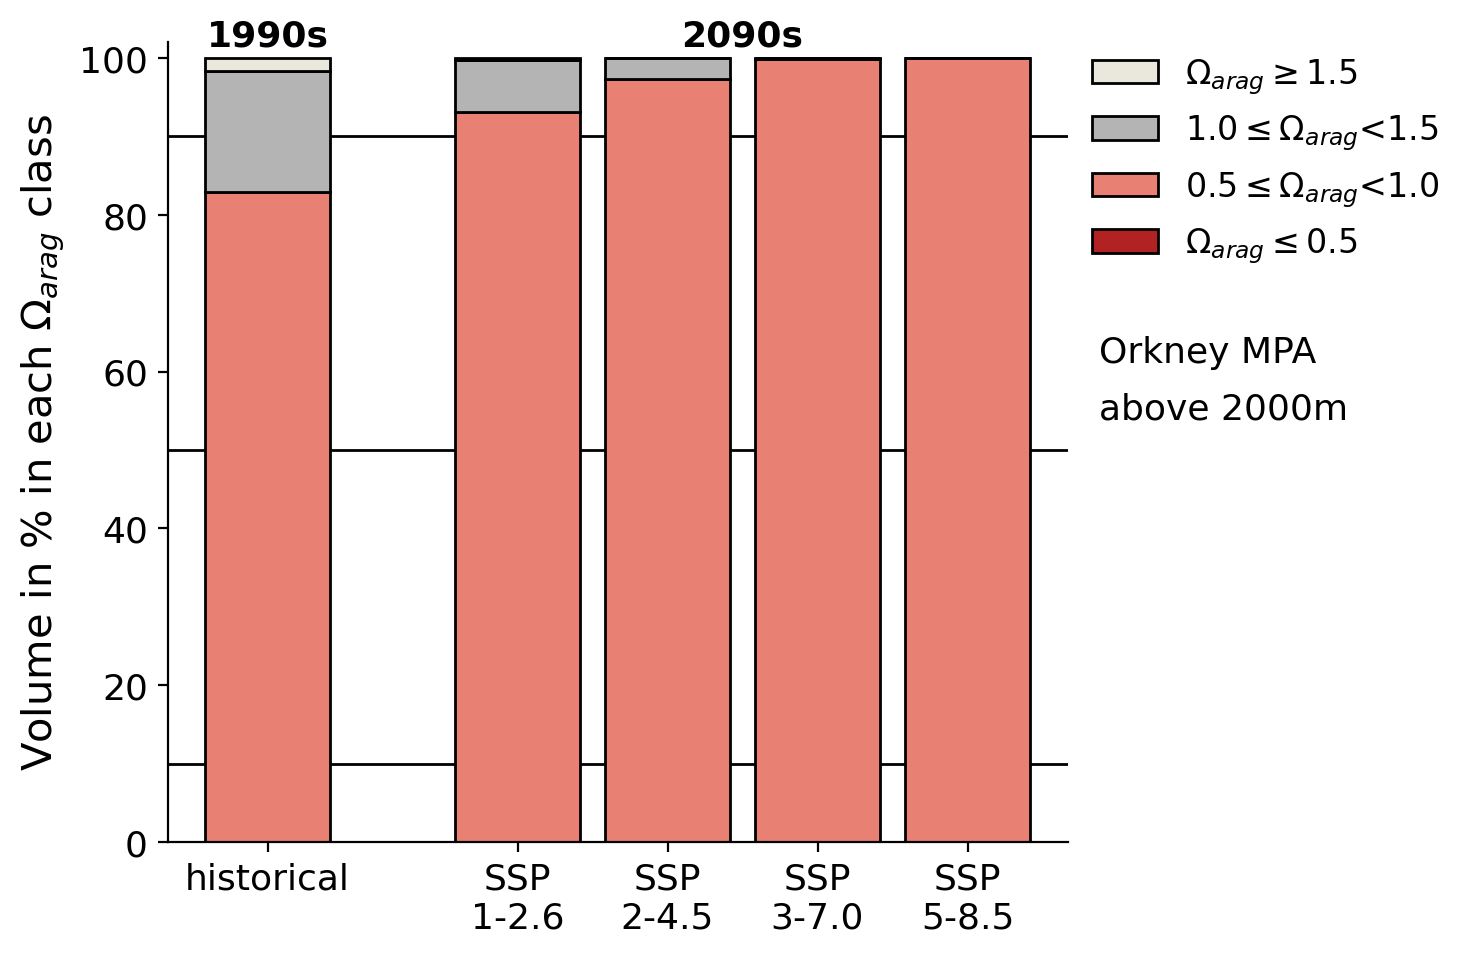

Process  AntarcticPeninsula_MPA


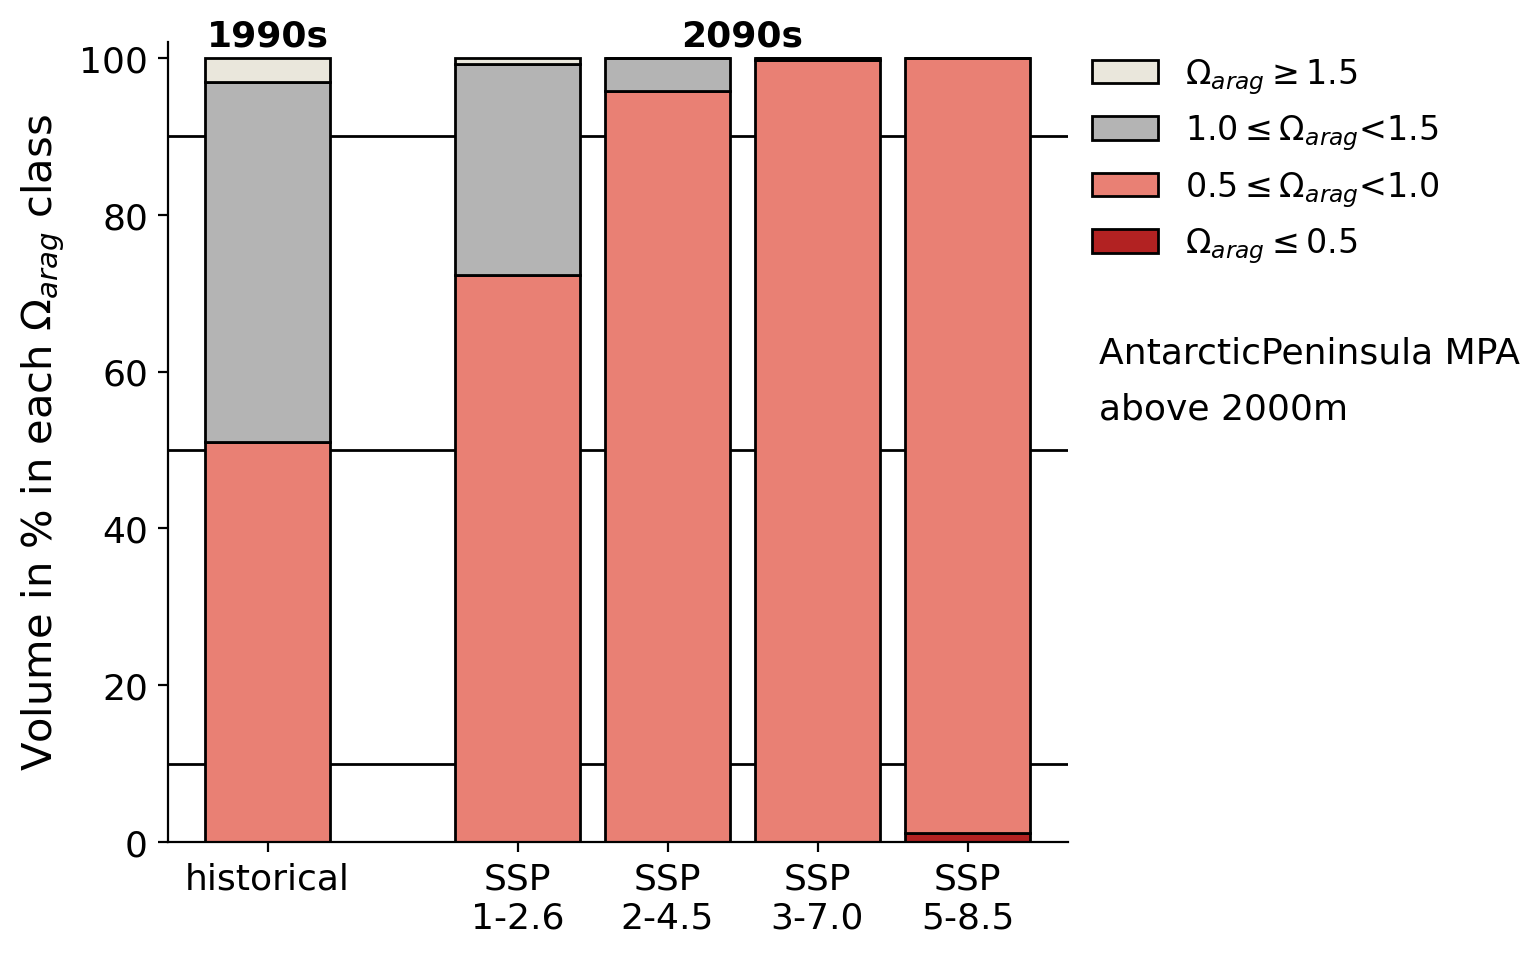

Process  East_Antarctica_all_MPA


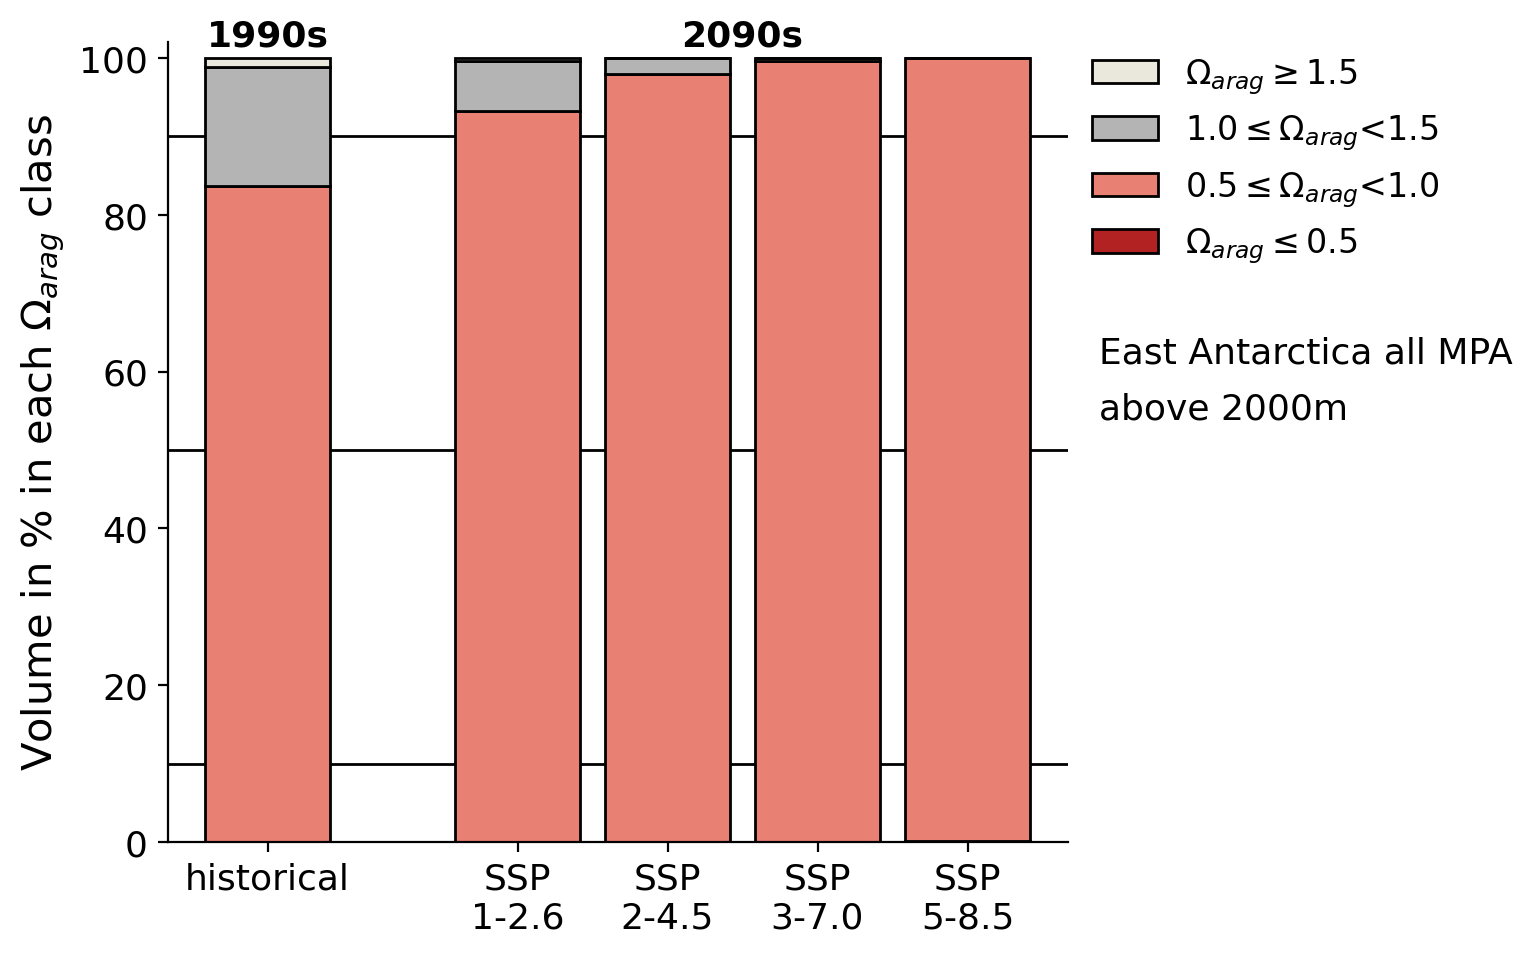

Process  East_Antarctica_all_MPA_shelf


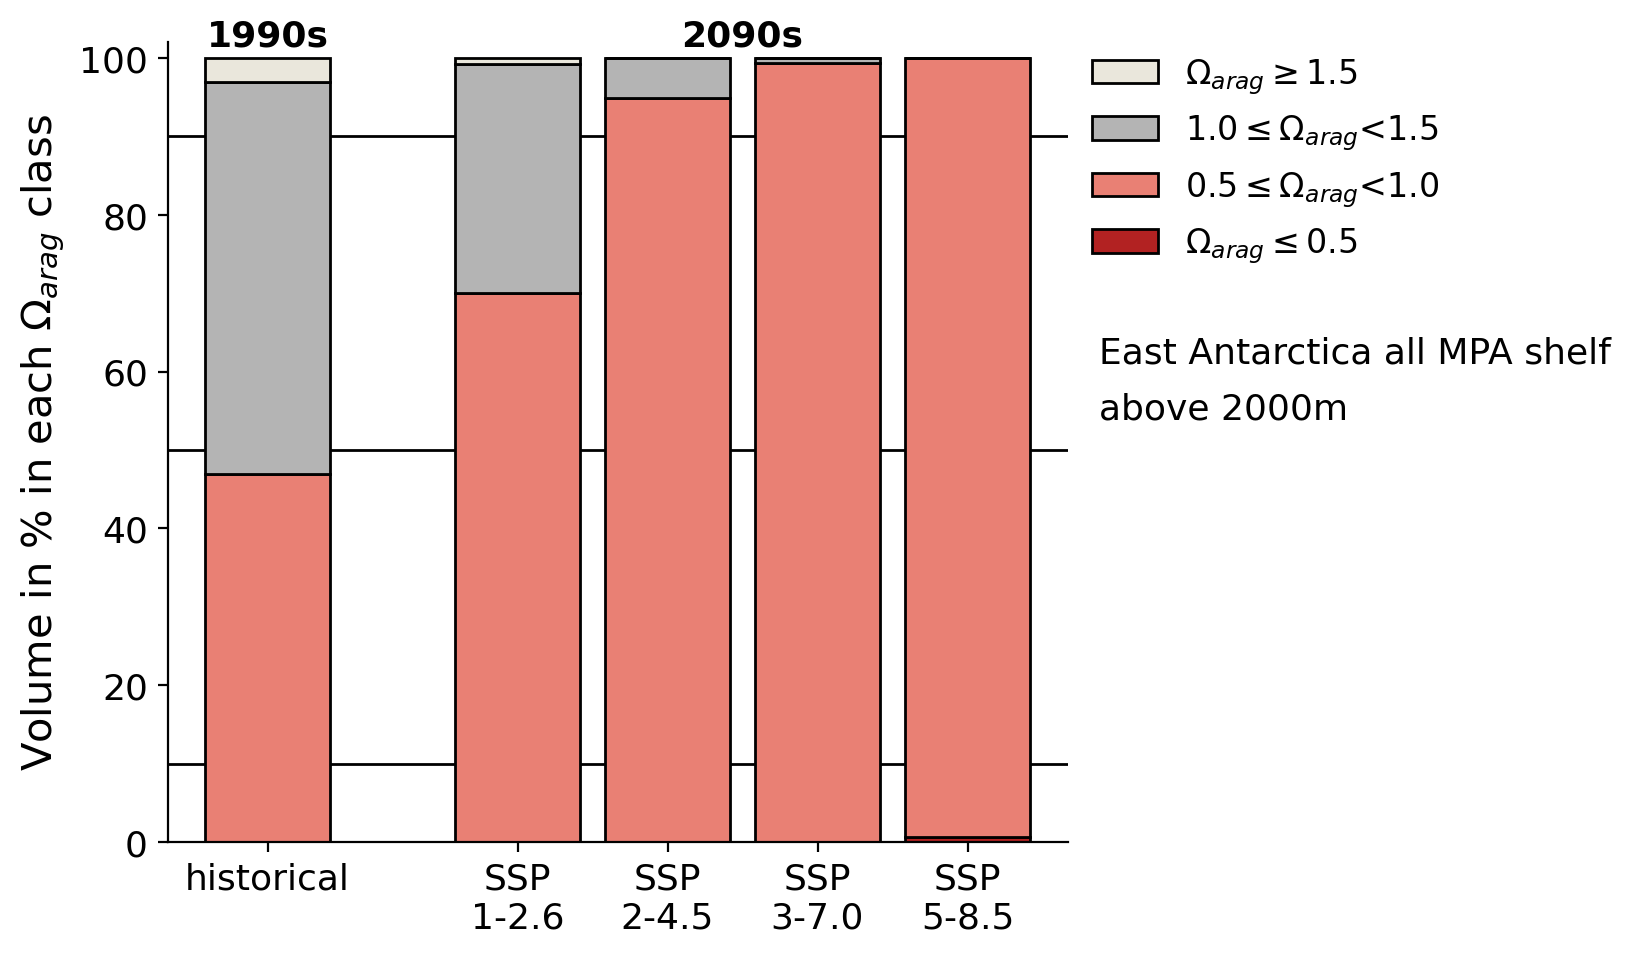

done


In [15]:
#----
# PLOT volume distribution of omega calcite classes
#----

save_plots = False
display_plots = True
plot_eps = False
            
depth_level_list = ['above2000'] #,'water_column']

# all subregions available in file
subregions = ['all_shelves','WeddellSea','eWeddellSea','Prydz','Adelie','RossSea','Amundsen_Bellingshausen','WAP',\
             'RossSea_MPA','RossSea_MPA_shelf','RossSea_MPA_openOcean',\
              'WeddellSea_MPA','WeddellSea_MPA_shelf','WeddellSea_MPA_openOcean',\
              'Orkney_MPA','AntarcticPeninsula_MPA',\
             'East_Antarctica_1_MPA','East_Antarctica_2_MPA','East_Antarctica_3_MPA','East_Antarctica_all_MPA',\
             'East_Antarctica_1_MPA_shelf','East_Antarctica_2_MPA_shelf',\
              'East_Antarctica_3_MPA_shelf','East_Antarctica_all_MPA_shelf',\
             'East_Antarctica_1_MPA_openOcean','East_Antarctica_2_MPA_openOcean',\
              'East_Antarctica_3_MPA_openOcean','East_Antarctica_all_MPA_openOcean']

sim_list = ['ssp585','ssp370','ssp245','ssp126','simB']
sim_list2 = ['SSP\n5-8.5','SSP\n3-7.0','SSP\n2-4.5','SSP\n1-2.6','simB']

color_list = [(51./255.,34./255.,136./255.),(136./255.,204./255.,238./255.),\
                              (68./255.,170./255.,153./255.),(17./255.,119./255.,51./255.),\
                              (153./255.,153./255.,51./255.),(221./255.,204./255.,119./255.),\
                               (204./255.,102./255.,119./255.),(136./255.,34./255.,85./255.)]

#-----
# colors from here: https://visme.co/blog/website-color-schemes/ (schemes 8 & 19)
#-----
# aragonite
color1 = (178./255.,34./255.,34./255.) ## make red darker (232./255.,90./255.,79./255.) # lowest omega values
color2 = (233./255.,128./255.,116./255.) #(240./255.,128./255.,128./255.) #(205./255.,92./255.,92./255.) #(233./255.,128./255.,116./255.) # 
color3 = (180./255.,180./255.,180./255.) # make grey lighter (142./255.,141./255.,138./255.) # 
color4 = (216./255.,195./255.,165./255.) # 
color5 = (234./255.,231./255.,220./255.) # highest omega values


fs = 13
dpicnt = 200
            
for dd in range(0,len(depth_level_list)):
    depth_level = depth_level_list[dd] 
    print ('Process ',depth_level)
            
    vari1 = 'omegaA_vol_above2_'+depth_level
    vari2 = 'omegaC_vol_above2_'+depth_level
    dataA_above2,dataC_above2 = get_data(vari1,vari2,path_to_data)

    vari1 = 'omegaA_vol_above15_'+depth_level
    vari2 = 'omegaC_vol_above15_'+depth_level
    dataA_above15,dataC_above15 = get_data(vari1,vari2,path_to_data)

    vari1 = 'omegaA_vol_below15_'+depth_level
    vari2 = 'omegaC_vol_below15_'+depth_level
    dataA_below15,dataC_below15 = get_data(vari1,vari2,path_to_data)

    vari1 = 'omegaA_vol_below1_'+depth_level
    vari2 = 'omegaC_vol_below1_'+depth_level
    dataA_below1,dataC_below1 = get_data(vari1,vari2,path_to_data)

    vari1 = 'omegaA_vol_below05_'+depth_level
    vari2 = 'omegaC_vol_below05_'+depth_level
    dataA_below05,dataC_below05 = get_data(vari1,vari2,path_to_data)

    for rr in [0,8,9,11,12,14,15,19,23]: #range(0,len(subregions)):
        rr = subregions.index(subregions[rr])
        print ('Process ',subregions[rr])
        
        dataA_above2a = np.mean(dataA_above2[:,:,rr,:],axis=0)
        dataC_above2a = np.mean(dataC_above2[:,:,rr,:],axis=0)

        dataA_above15a = np.mean(dataA_above15[:,:,rr,:],axis=0)
        dataC_above15a = np.mean(dataC_above15[:,:,rr,:],axis=0)

        dataA_below15a = np.mean(dataA_below15[:,:,rr,:],axis=0)
        dataC_below15a = np.mean(dataC_below15[:,:,rr,:],axis=0)

        dataA_below1a = np.mean(dataA_below1[:,:,rr,:],axis=0)
        dataC_below1a = np.mean(dataC_below1[:,:,rr,:],axis=0)

        dataA_below05a = np.mean(dataA_below05[:,:,rr,:],axis=0)
        dataC_below05a = np.mean(dataC_below05[:,:,rr,:],axis=0)

        # 1990s
        dataA_above2_1990s  = np.mean(dataA_above2a[0:9+1,0],axis=0)
        dataA_above15_1990s = np.mean(dataA_above15a[0:9+1,0],axis=0)
        dataA_below15_1990s = np.mean(dataA_below15a[0:9+1,0],axis=0)
        dataA_below1_1990s  = np.mean(dataA_below1a[0:9+1,0],axis=0)
        dataA_below05_1990s = np.mean(dataA_below05a[0:9+1,0],axis=0)
        
        a1 = dataA_above2_1990s
        a2 = dataA_above15_1990s-dataA_above2_1990s
        a3 = dataA_below15_1990s-dataA_below1_1990s
        a4 = dataA_below1_1990s-dataA_below05_1990s
        a5 = dataA_below05_1990s
        #print 'HISTORICAL: >2, 1.5-2, 1-1.5, 0.5-1, <0.5:',a1,a2,a3,a4,a5

        # 2050s
        dataA_above2_2050s  = np.mean(dataA_above2a[60:69+1,:],axis=0)
        dataA_above15_2050s = np.mean(dataA_above15a[60:69+1,:],axis=0)
        dataA_below15_2050s = np.mean(dataA_below15a[60:69+1,:],axis=0)
        dataA_below1_2050s  = np.mean(dataA_below1a[60:69+1,:],axis=0)
        dataA_below05_2050s = np.mean(dataA_below05a[60:69+1,:],axis=0)

        # 2090s
        dataA_above2_2090s  = np.mean(dataA_above2a[100:109+1,:],axis=0)
        dataA_above15_2090s = np.mean(dataA_above15a[100:109+1,:],axis=0)
        dataA_below15_2090s = np.mean(dataA_below15a[100:109+1,:],axis=0)
        dataA_below1_2090s  = np.mean(dataA_below1a[100:109+1,:],axis=0)
        dataA_below05_2090s = np.mean(dataA_below05a[100:109+1,:],axis=0)
            
        del dataA_above2a,dataA_above15a,dataA_below15a,dataA_below1a,dataA_below05a
        
        #---
        # have all scenarios in a single plot
        #---
        plot_combined = True
        if plot_combined:
            
            width1 = 0.5
            ec = 'k'
            
            fig7= plt.figure(num=18, figsize=(4.5,4), dpi=dpicnt, facecolor='w', edgecolor='k')
            ax = fig7.add_axes([0, 0, 1, 1])
            
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            #ax.spines['bottom'].set_visible(False)
            #ax.spines['left'].set_visible(False)

            # 1990s
            xpos = 1
            plt.bar(xpos,a5,color=color1,width=width1,edgecolor=ec,label='$\Omega_{arag}$$\leq$0.5')
            plt.bar(xpos,a4,bottom=a5,color=color2,width=width1,edgecolor=ec,label='$0.5\leq\Omega_{arag}$<1.0')
            plt.bar(xpos,a3,bottom=a5+a4,color=color3,width=width1,edgecolor=ec,label='$1.0\leq\Omega_{arag}$<1.5')
            #plt.bar(xpos,a2,bottom=a5+a4+a3,color=color4,width=width1,edgecolor=ec,label='$1.5\leq\Omega_{arag}$<2')
            plt.bar(xpos,a1+a2,bottom=a5+a4+a3,color=color5,width=width1,edgecolor=ec,label='$\Omega_{arag}$$\geq$1.5')
            
            #----
            # 2090s
            #----
            ss = 3
            c1 = dataA_above2_2090s[ss]
            c2 = dataA_above15_2090s[ss]-dataA_above2_2090s[ss]
            c3 = dataA_below15_2090s[ss]-dataA_below1_2090s[ss]
            c4 = dataA_below1_2090s[ss]-dataA_below05_2090s[ss]
            c5 = dataA_below05_2090s[ss]
            xpos = 2
            plt.bar(xpos,c5,color=color1,width=width1,edgecolor=ec)
            plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
            plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
            #plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
            plt.bar(xpos,c2+c1,bottom=c5+c4+c3,color=color5,width=width1,edgecolor=ec)
            #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5
            
            ss = 2
            c1 = dataA_above2_2090s[ss]
            c2 = dataA_above15_2090s[ss]-dataA_above2_2090s[ss]
            c3 = dataA_below15_2090s[ss]-dataA_below1_2090s[ss]
            c4 = dataA_below1_2090s[ss]-dataA_below05_2090s[ss]
            c5 = dataA_below05_2090s[ss]
            xpos = 2.6
            plt.bar(xpos,c5,color=color1,width=width1,edgecolor=ec)
            plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
            plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
            #plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
            plt.bar(xpos,c2+c1,bottom=c5+c4+c3,color=color5,width=width1,edgecolor=ec)
            #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5

            
            ss = 1
            c1 = dataA_above2_2090s[ss]
            c2 = dataA_above15_2090s[ss]-dataA_above2_2090s[ss]
            c3 = dataA_below15_2090s[ss]-dataA_below1_2090s[ss]
            c4 = dataA_below1_2090s[ss]-dataA_below05_2090s[ss]
            c5 = dataA_below05_2090s[ss]
            xpos = 3.2
            plt.bar(xpos,c5,color=color1,width=width1,edgecolor=ec)
            plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
            plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
            #plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
            plt.bar(xpos,c2+c1,bottom=c5+c4+c3,color=color5,width=width1,edgecolor=ec)
            #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5
            
            ss = 0
            c1 = dataA_above2_2090s[ss]
            c2 = dataA_above15_2090s[ss]-dataA_above2_2090s[ss]
            c3 = dataA_below15_2090s[ss]-dataA_below1_2090s[ss]
            c4 = dataA_below1_2090s[ss]-dataA_below05_2090s[ss]
            c5 = dataA_below05_2090s[ss]
            xpos = 3.8
            plt.bar(xpos,c5,color=color1,width=width1,edgecolor=ec)
            plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
            plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
            #plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
            plt.bar(xpos,c1+c2,bottom=c5+c4+c3,color=color5,width=width1,edgecolor=ec)
            #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5
            
            
            plt.ylim((0,102))
            xlim1,xlim2 = 0.6,4.2
            plt.hlines(90,xlim1,xlim2,color='black',linewidth=1,linestyle='-',zorder=0)
            plt.hlines(50,xlim1,xlim2,color='black',linewidth=1,linestyle='-',zorder=0)
            plt.hlines(10,xlim1,xlim2,color='black',linewidth=1,linestyle='-',zorder=0)
            plt.xlim((xlim1,xlim2))
            
            handles, labels = plt.gca().get_legend_handles_labels() 
            order = [3,2,1,0] ##specify order of items in legend

            plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], \
                       loc='upper center', bbox_to_anchor=(1.22, 1.02),\
                            ncol=1,fancybox=True, frameon=False,shadow=False,prop={'size': 12})

            plt.xticks([1,2,2.6,3.2,3.8],['historical',sim_list2[3],sim_list2[2],\
                        sim_list2[1],sim_list2[0]],fontsize=fs) #fontweight='bold',
        
            ypos = 101.5
            plt.annotate('1990s',xy=(1,ypos), xycoords='data',\
                                         ha='center',fontsize=fs,fontweight='bold',color='black')
            plt.annotate('2090s',xy=(2.9,ypos), xycoords='data',\
                                         ha='center',fontsize=fs,fontweight='bold',color='black')
            
            plt.yticks(fontsize=fs)

            plt.ylabel('Volume in % in each $\Omega_{arag}$ class',fontsize=fs+2)

            xpos_tt = 1.035
            plt.annotate(subregions[rr].replace("_"," "),xy=(xpos_tt,0.6), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')
        
            if depth_level in ['water_column']:
                plt.annotate('whole water column',xy=(xpos_tt,0.53), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')
            elif depth_level in ['top50']:
                plt.annotate('top 50m',xy=(xpos_tt,0.53), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')
            elif depth_level in ['0_10']:
                plt.annotate('0-10m',xy=(xpos_tt,0.53), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')
            elif depth_level in ['10_100']:
                plt.annotate('10-100m',xy=(xpos_tt,0.53), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')
            elif depth_level in ['100_500']:
                plt.annotate('100-500m',xy=(xpos_tt,0.53), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')
            elif depth_level in ['below500']:
                plt.annotate('below 500m',xy=(xpos_tt,0.53), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')
            elif depth_level in ['above2000']:
                plt.annotate('above 2000m',xy=(xpos_tt,0.53), xycoords='axes fraction',\
                                         ha='left',fontsize=fs,color='black')

            if save_plots:
                filename = 'Volume_omega_arag_saturation_classes_ALL_SIM_'+\
                        subregions[rr]+'_'+depth_level+'_without_2050s.png'
                plt.savefig(savepath+filename,dpi = dpicnt, bbox_inches='tight')
                del filename

            if display_plots:
                plt.show()
            else:
                plt.close(fig7)
                
                
            #----
            # eps version
            #----
            if plot_eps:
                fig7= plt.figure(num=18, figsize=(4.5,4), dpi=dpicnt, facecolor='w', edgecolor='k')
                ax = fig7.add_axes([0, 0, 1, 1])

                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                #ax.spines['bottom'].set_visible(False)
                #ax.spines['left'].set_visible(False)

                # 1990s
                xpos = 1
                plt.bar(xpos,a5,color=color1,width=width1,edgecolor=ec,label='$\Omega_{arag}$$\leq$0.5')
                plt.bar(xpos,a4,bottom=a5,color=color2,width=width1,edgecolor=ec,label='$0.5\leq\Omega_{arag}$<1.0')
                plt.bar(xpos,a3,bottom=a5+a4,color=color3,width=width1,edgecolor=ec,label='$1.0\leq\Omega_{arag}$<1.5')
                #plt.bar(xpos,a2,bottom=a5+a4+a3,color=color4,width=width1,edgecolor=ec,label='$1.5\leq\Omega_{arag}$<2')
                plt.bar(xpos,a1+a2,bottom=a5+a4+a3,color=color5,width=width1,edgecolor=ec,label='$\Omega_{arag}$$\geq$1.5')

                #----
                # 2090s
                #----
                ss = 3
                c1 = dataA_above2_2090s[ss]
                c2 = dataA_above15_2090s[ss]-dataA_above2_2090s[ss]
                c3 = dataA_below15_2090s[ss]-dataA_below1_2090s[ss]
                c4 = dataA_below1_2090s[ss]-dataA_below05_2090s[ss]
                c5 = dataA_below05_2090s[ss]
                xpos = 2
                plt.bar(xpos,c5,color=color1,width=width1,edgecolor=ec)
                plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
                plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
                #plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
                plt.bar(xpos,c2+c1,bottom=c5+c4+c3,color=color5,width=width1,edgecolor=ec)
                #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5

                ss = 2
                c1 = dataA_above2_2090s[ss]
                c2 = dataA_above15_2090s[ss]-dataA_above2_2090s[ss]
                c3 = dataA_below15_2090s[ss]-dataA_below1_2090s[ss]
                c4 = dataA_below1_2090s[ss]-dataA_below05_2090s[ss]
                c5 = dataA_below05_2090s[ss]
                xpos = 2.6
                plt.bar(xpos,c5,color=color1,width=width1,edgecolor=ec)
                plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
                plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
                #plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
                plt.bar(xpos,c2+c1,bottom=c5+c4+c3,color=color5,width=width1,edgecolor=ec)
                #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5


                ss = 1
                c1 = dataA_above2_2090s[ss]
                c2 = dataA_above15_2090s[ss]-dataA_above2_2090s[ss]
                c3 = dataA_below15_2090s[ss]-dataA_below1_2090s[ss]
                c4 = dataA_below1_2090s[ss]-dataA_below05_2090s[ss]
                c5 = dataA_below05_2090s[ss]
                xpos = 3.2
                plt.bar(xpos,c5,color=color1,width=width1,edgecolor=ec)
                plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
                plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
                #plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
                plt.bar(xpos,c2+c1,bottom=c5+c4+c3,color=color5,width=width1,edgecolor=ec)
                #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5

                ss = 0
                c1 = dataA_above2_2090s[ss]
                c2 = dataA_above15_2090s[ss]-dataA_above2_2090s[ss]
                c3 = dataA_below15_2090s[ss]-dataA_below1_2090s[ss]
                c4 = dataA_below1_2090s[ss]-dataA_below05_2090s[ss]
                c5 = dataA_below05_2090s[ss]
                xpos = 3.8
                plt.bar(xpos,c5,color=color1,width=width1,edgecolor=ec)
                plt.bar(xpos,c4,bottom=c5,color=color2,width=width1,edgecolor=ec)
                plt.bar(xpos,c3,bottom=c5+c4,color=color3,width=width1,edgecolor=ec)
                #plt.bar(xpos,c2,bottom=c5+c4+c3,color=color4,width=width1,edgecolor=ec)
                plt.bar(xpos,c1+c2,bottom=c5+c4+c3,color=color5,width=width1,edgecolor=ec)
                #del b1,b2,b3,b4,b5,c1,c2,c3,c4,c5


                plt.ylim((0,102))
                xlim1,xlim2 = 0.6,4.2
                plt.hlines(90,xlim1,xlim2,color='black',linewidth=1,linestyle='-',zorder=0)
                plt.hlines(50,xlim1,xlim2,color='black',linewidth=1,linestyle='-',zorder=0)
                plt.hlines(10,xlim1,xlim2,color='black',linewidth=1,linestyle='-',zorder=0)
                plt.xlim((xlim1,xlim2))

                plt.xticks([1,2,2.6,3.2,3.8],[],fontsize=fs) #fontweight='bold',

                plt.yticks([0,20,40,60,80,100],[],fontsize=fs)

                if save_plots:
                    filename = 'Volume_omega_arag_saturation_classes_ALL_SIM_'+\
                            subregions[rr]+'_'+depth_level+'_without_2050s.eps'
                    plt.savefig(savepath+'eps/'+filename,dpi = dpicnt, bbox_inches='tight',format='eps')
                    del filename

                if display_plots:
                    plt.show()
                else:
                    plt.close(fig7)
                
        del dataA_above2_2090s,dataA_above15_2090s,dataA_below15_2090s,dataA_below1_2090s,dataA_below05_2090s
        del dataA_above2_2050s,dataA_above15_2050s,dataA_below15_2050s,dataA_below1_2050s,dataA_below05_2050s
            
print ('done')



In [ ]:
print (savepath1)
